## **Latar Belakang**

Sebuah perusahaan yang bergerak di bidang healthcare ingin meningkatkan atmosphere perusahaannya agar pegawai tetap loyal atau tidak resign dan berpindah ke perusahaan lain. Oleh karena itu, tim data ditugaskan untuk mengetahui fitur penting apa saja yang perlu dipertahankan atau ditingkatkan dari perusahaan.  

## **Rumusan Masalah**

Perusahaan ingin mengetahui kemungkinan apa saja yang mempengaruhi karyawan bertahan di perusahaan.

1. Mengetahui adakah perbedaan pendapatan antara karyawan yang telah keluar dan yang masih bertahan.
2. Mengetahui apakah ada perbedaaan lingkungan kerja antara karyawan yang telah keluar dan yang masih bertahan.
3. Mengetahui apakah perbedaan kesempatan karir bertumbuh antara karyawan yang telah keluar dan yang masih bertahan.
4. Mengetahui apakah ada perbedaan perspektif work life balance antara karyawan yang telah keluar dan yang masih bertahan.  
5. Mengetahui apakah ada perbedaan waktu bekerja di perusahaan antara karyawan yang telah keluar dan yang masih bertahan.






In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dataset ini berisi informasi terkait Umur, status di pekerjaan dan gaji pegawai. Ada 34 kolom di dalam dataset hr_analytics, yaitu:  

* EmpID: ID unik untuk setiap karyawan
* Age: Umur karyawan
* AgeGroup: kelompok umur karyawan
* Attrition: keluarnya karyawan dari perusahaan (termasuk pensiun dan kematian)
* BusinessTravel: frekuensi karyawan yang berpergian untuk urusan pekerjaan
* DailyRate: gaji perhari karyawaan
* Department: departemen yang ada di perusahaan
* DistanceFromHome: jarak dari tempat tinggal ke tempat kerja
* Education: seberapa tinggi jenjang pendidikan
* EducationField: latar belakang pendidikan
* EmployeeNumber: registrasi awal karyawan
* EnvironmentSatisfaction: kepuasaan di lingkungan bekerja
* Gender: jenis kelamin
* HourlyRate: gaji perjam karyawan
* JobInvolvement: rating keterlibatan karyawan dalam pekerjaan
* JobLevel: tingkat jabatan
* JobRole: profesi pekerjaan
* JobSatisfaction: kepuasaan dalam perkerjaan
* MaritalStatus: Status pernikahan
* MonthlyIncome: pendapatan perbulan
* SalarySlab: tingkat gaji
* MonthlyRate: gaji tetap bulanan
* NumCompaniesWorked: riwayat pekerjaan
* OverTime: lembur
* PercentSalaryHike: persentasi kenaikan gaji
* PerformanceRating: rating performa karyawan
* RelationshipSatisfaction: kepuasaan dalam hubungan sosial
* StockOptionLevel: opsi kepemilikan saham perusahaan
* TotalWorkingYears: jumlah pengalaman bekerja dalam tahun
* TrainingTimesLastYear: jumlah latihan tahun lalu
* WorkLifeBalance: tingkat keseimbangan dan pekerjaan dan kehidupan
* YearsAtCompany: waktu bekerja di perusahaan
* YearsInCurrentRole: waktu berapa lama di jabatan
* YearsSinceLastPromotion: berapa tahun terakhir kali mendapatkan promosi
* YearsWithCurrManager: waktu dengan manajer sekarang


In [ ]:
# Reviewing dataset 5 teratas
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR-NpRj2MA0XBjp5mvmp-zNqOsnjZQJVMz7A3Zhl7gFCU2SlUQTcSpc-i7jnELZvS2ZtJMzZq7aJjW9/pub?gid=1197904129&single=true&output=csv')
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [ ]:
# Reviewing dataset 5 terbawah
df.tail()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,4,Medical,...,3,80,1,19,2,4,1,0,0,0.0


## **DATA UNDERSTANDING & CLEANING**



In [ ]:
# Melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [ ]:
# Melihat daftar kolom dari dataset
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Melihat berapa jumlah baris dan kolom
df.shape

(1480, 38)

In [ ]:
# Calculating missing value
df.isna().sum()

EmpID                       0 
Age                         0 
AgeGroup                    0 
Attrition                   0 
BusinessTravel              0 
DailyRate                   0 
Department                  0 
DistanceFromHome            0 
Education                   0 
EducationField              0 
EmployeeCount               0 
EmployeeNumber              0 
EnvironmentSatisfaction     0 
Gender                      0 
HourlyRate                  0 
JobInvolvement              0 
JobLevel                    0 
JobRole                     0 
JobSatisfaction             0 
MaritalStatus               0 
MonthlyIncome               0 
SalarySlab                  0 
MonthlyRate                 0 
NumCompaniesWorked          0 
Over18                      0 
OverTime                    0 
PercentSalaryHike           0 
PerformanceRating           0 
RelationshipSatisfaction    0 
StandardHours               0 
StockOptionLevel            0 
TotalWorkingYears           0 
Training

In [ ]:
# Percentage missing value to All dataset
df.isna().sum()/df.shape[0]*100

EmpID                       0.000000
Age                         0.000000
AgeGroup                    0.000000
Attrition                   0.000000
BusinessTravel              0.000000
DailyRate                   0.000000
Department                  0.000000
DistanceFromHome            0.000000
Education                   0.000000
EducationField              0.000000
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
HourlyRate                  0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             0.000000
MaritalStatus               0.000000
MonthlyIncome               0.000000
SalarySlab                  0.000000
MonthlyRate                 0.000000
NumCompaniesWorked          0.000000
Over18                      0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
P

In [ ]:
# unique value in every column

pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

<ipython-input-124-5399d31f11ac>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,EmpID,1470,"[RM297, RM302, RM458, RM728, RM829, RM973, RM1154, RM1312, RM128, RM150, RM172, RM178, RM423, RM689, RM854, RM893, RM910, RM103, RM488, RM514, RM663, RM690, RM732, RM777, RM857, RM877, RM1179, RM1198, RM024, RM275, RM358, RM363, RM371, RM497, RM664, RM778, RM816, RM916, RM1153, RM1272, RM1437, RM018, RM110, RM129, RM161, RM207, RM384, RM444, RM499, RM631, RM667, RM735, RM861, RM1138, RM1274, RM1340, RM1424, RM087, RM346, RM517, RM551, RM566, RM586, RM911, RM1083, RM1128, RM1202, RM1214, RM1239, RM1409, RM1439, RM021, RM035, RM097, RM114, RM381, RM415, RM471, RM475, RM477, RM480, RM526, RM587, RM641, RM725, RM842, RM872, RM1026, RM1061, RM1062, RM1098, RM1169, RM1218, RM1223, RM1231, RM1246, RM1408, RM108, RM109, RM139, ...]"
1,Age,43,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]"
2,AgeGroup,5,"[18-25, 26-35, 36-45, 46-55, 55+]"
3,Attrition,2,"[Yes, No]"
4,BusinessTravel,4,"[Travel_Rarely, Travel_Frequently, Non-Travel, TravelRarely]"
5,DailyRate,886,"[230, 812, 1306, 287, 247, 1124, 544, 1431, 528, 1181, 602, 303, 489, 419, 645, 504, 265, 871, 959, 1362, 500, 129, 1097, 769, 805, 654, 1141, 727, 391, 996, 756, 895, 156, 1343, 1427, 1334, 984, 251, 546, 337, 501, 1123, 534, 594, 1256, 1136, 253, 1368, 604, 1230, 617, 217, 457, 1294, 581, 541, 1309, 885, 650, 310, 1243, 373, 507, 977, 1320, 427, 160, 571, 638, 673, 813, 1353, 1127, 1371, 1448, 535, 691, 823, 1287, 693, 1092, 1269, 1206, 477, 1476, 381, 830, 350, 567, 240, 506, 897, 771, 1280, 685, 675, 891, 688, 622, 810, ...]"
6,Department,3,"[Research & Development, Sales, Human Resources]"
7,DistanceFromHome,29,"[3, 10, 5, 8, 1, 14, 22, 2, 21, 9, 25, 6, 4, 11, 15, 12, 18, 7, 16, 19, 26, 20, 24, 23, 17, 13, 29, 28, 27]"
8,Education,5,"[3, 2, 1, 4, 5]"
9,EducationField,6,"[Life Sciences, Medical, Marketing, Technical Degree, Other, Human Resources]"


Berdasarkan kolom diatas, terdapat 38 kolom yang terdiri atas kolom kategorikal sejumlah X buah dan kolom numerikal sebanyak Y buah.

Kategorikal Nominal: 'EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime', 'EmployeeCount', 'Over18'.

Kategorikal Ordinal: 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating',
'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',

Numerikal: 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'StandardHours'

In [ ]:
# Statistical descriptive
# Numeric only
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Statistical descriptive
# Categorical only
kolom_kategorikal = df.select_dtypes(include=['object'])
kolom_kategorikal

,EmpID,AgeGroup,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,SalarySlab,Over18,OverTime
0,RM297,18-25,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Upto 5k,Y,No
1,RM302,18-25,No,Travel_Rarely,Sales,Medical,Female,Sales Representative,Single,Upto 5k,Y,No
2,RM458,18-25,Yes,Travel_Frequently,Sales,Marketing,Male,Sales Representative,Single,Upto 5k,Y,Yes
3,RM728,18-25,No,Non-Travel,Research & Development,Life Sciences,Male,Research Scientist,Single,Upto 5k,Y,No
4,RM829,18-25,Yes,Non-Travel,Research & Development,Medical,Male,Laboratory Technician,Single,Upto 5k,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,55+,No,Travel_Rarely,Research & Development,Life Sciences,Female,Manager,Married,15k+,Y,No
1476,RM428,55+,No,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Married,10k-15k,Y,No
1477,RM537,55+,No,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single,5k-10k,Y,No
1478,RM880,55+,No,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Divorced,5k-10k,Y,Yes


In [ ]:
# Cleaning # Dropping columns
columns_to_drop = ['Over18', 'EmployeeCount', 'StandardHours', 'YearsWithCurrManager']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Handling duplicated data
df.duplicated(['EmpID']).sum()

10

In [ ]:
duplicate_mask= df.duplicated()
duplicate_mask

0       False
1       False
2       False
3       False
4       False
        ...  
1475    False
1476    False
1477    False
1478    False
1479    False
Length: 1480, dtype: bool

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().any()

False

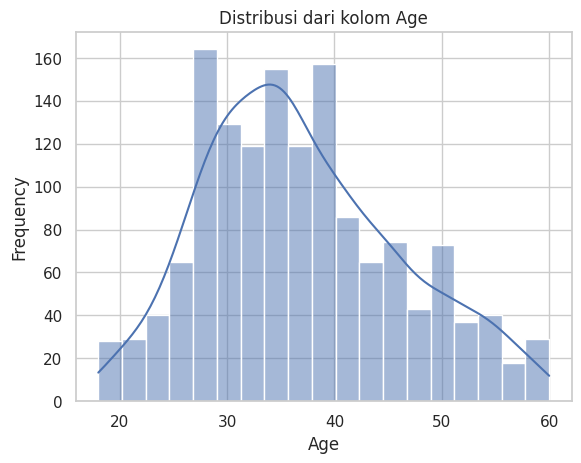

<Figure size 600x400 with 0 Axes>

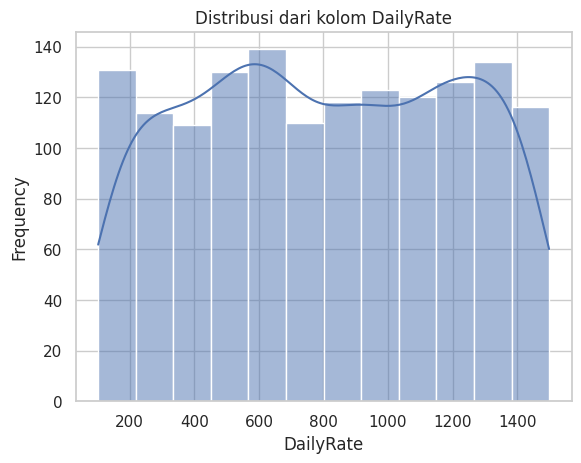

<Figure size 600x400 with 0 Axes>

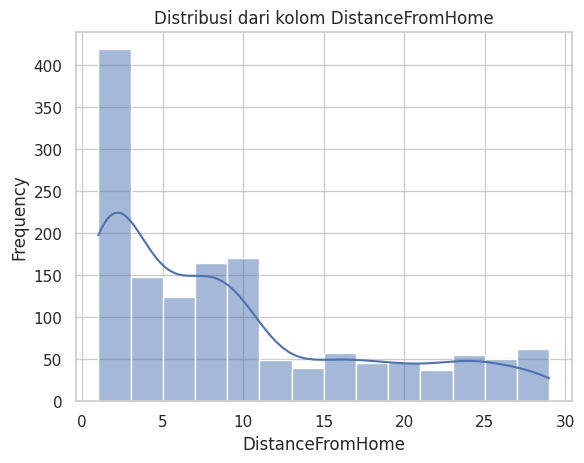

<Figure size 600x400 with 0 Axes>

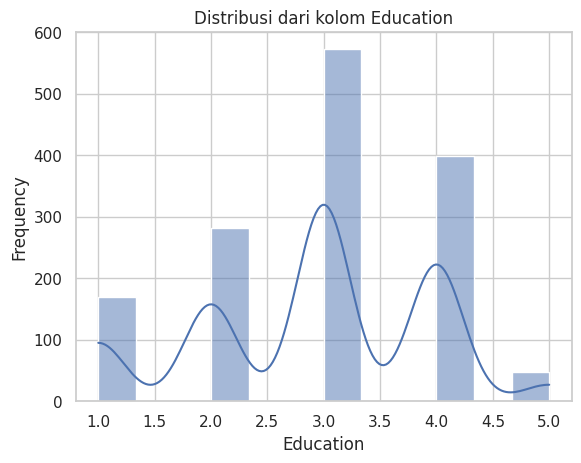

<Figure size 600x400 with 0 Axes>

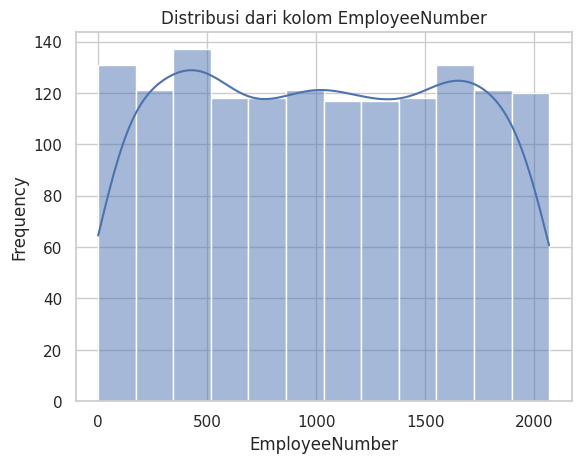

<Figure size 600x400 with 0 Axes>

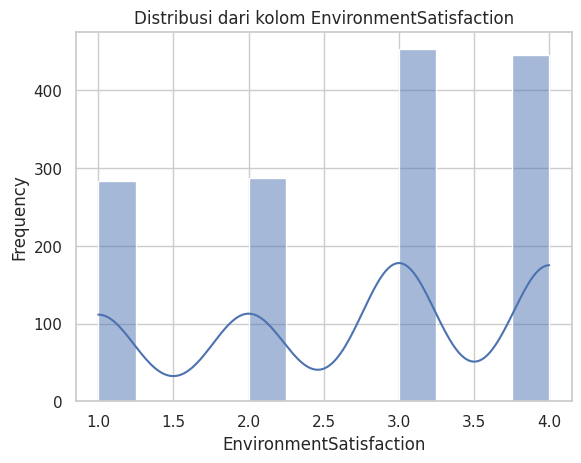

<Figure size 600x400 with 0 Axes>

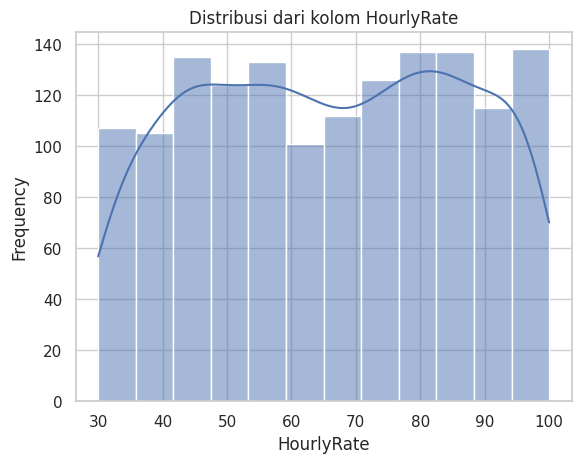

<Figure size 600x400 with 0 Axes>

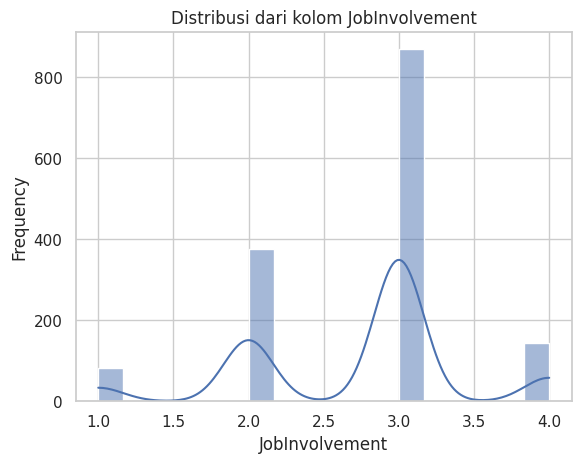

<Figure size 600x400 with 0 Axes>

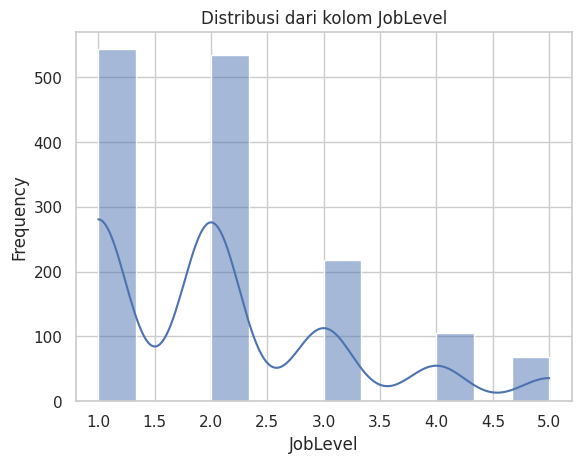

<Figure size 600x400 with 0 Axes>

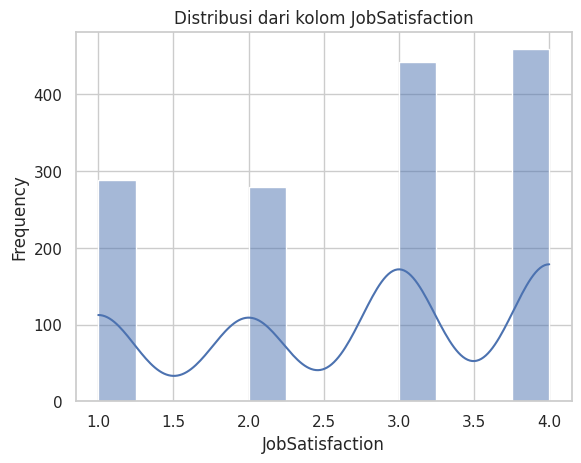

<Figure size 600x400 with 0 Axes>

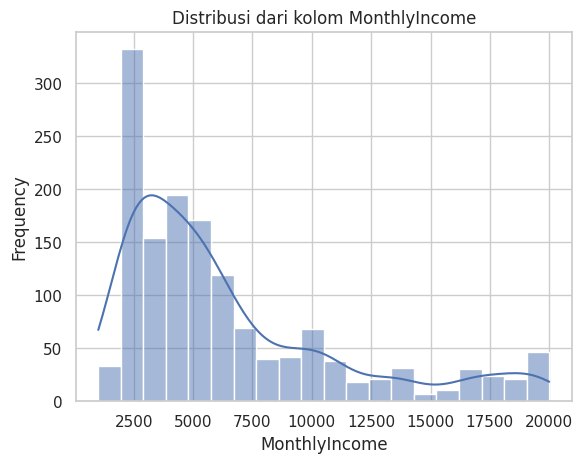

<Figure size 600x400 with 0 Axes>

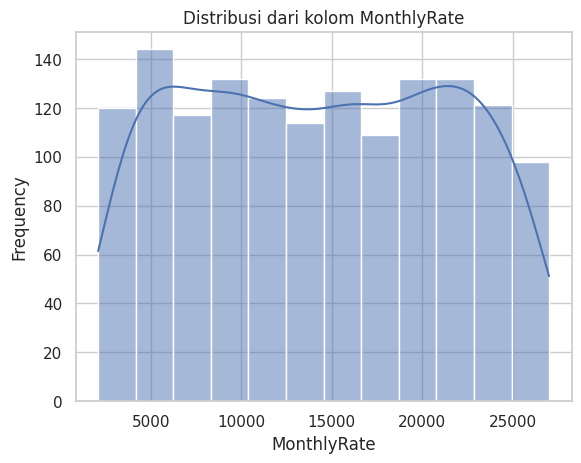

<Figure size 600x400 with 0 Axes>

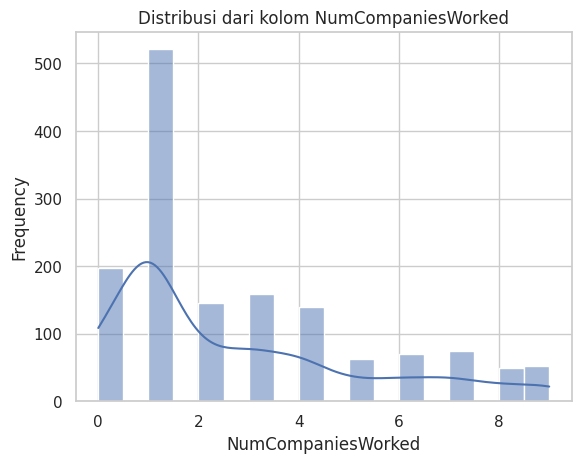

<Figure size 600x400 with 0 Axes>

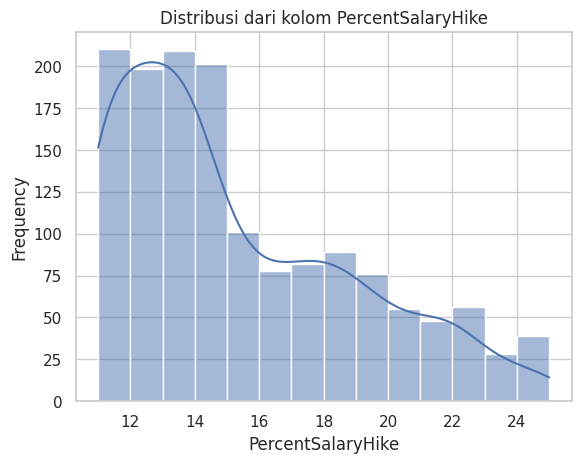

<Figure size 600x400 with 0 Axes>

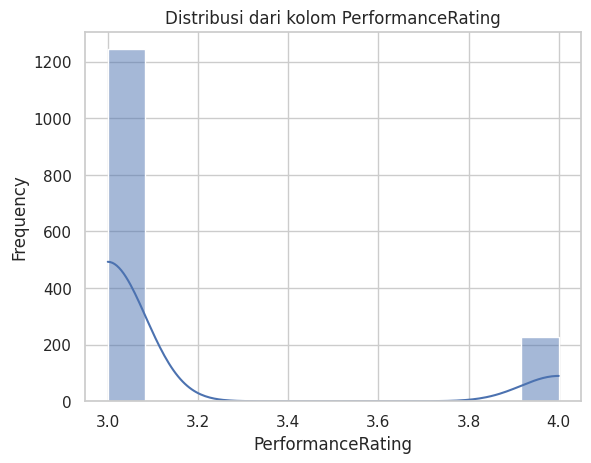

<Figure size 600x400 with 0 Axes>

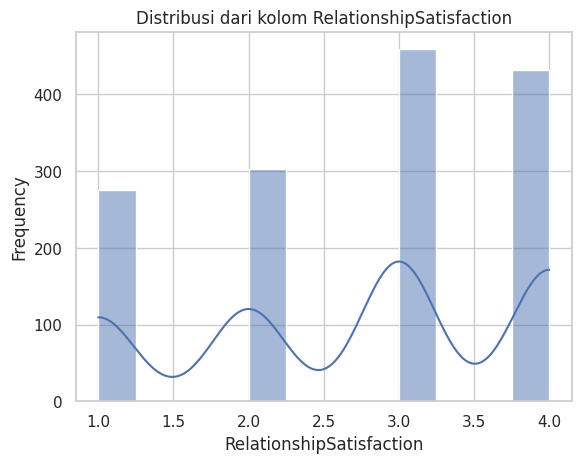

<Figure size 600x400 with 0 Axes>

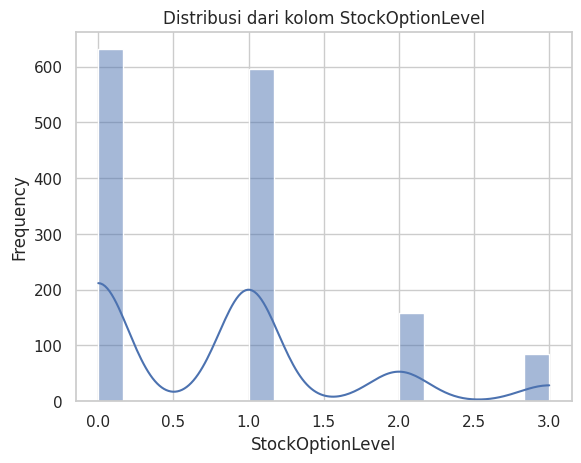

<Figure size 600x400 with 0 Axes>

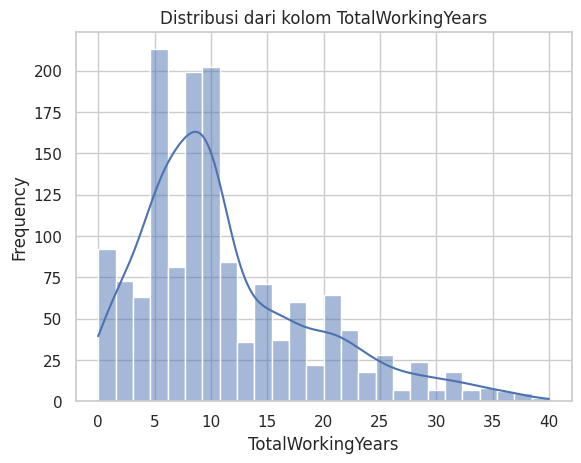

<Figure size 600x400 with 0 Axes>

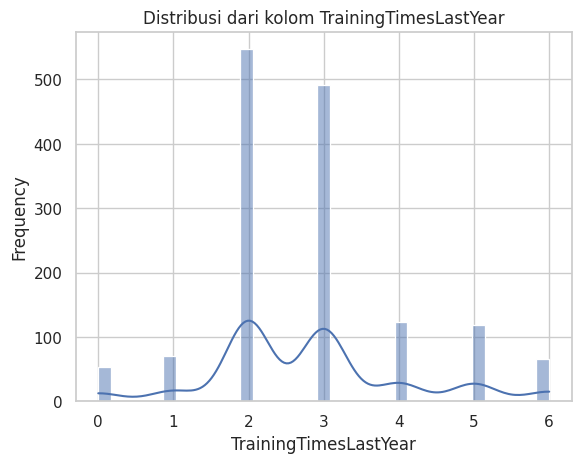

<Figure size 600x400 with 0 Axes>

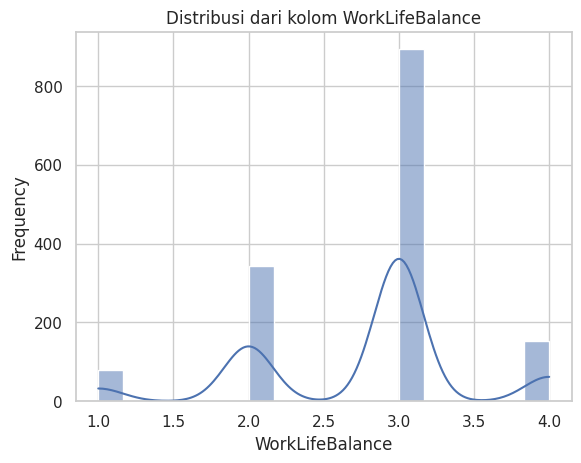

<Figure size 600x400 with 0 Axes>

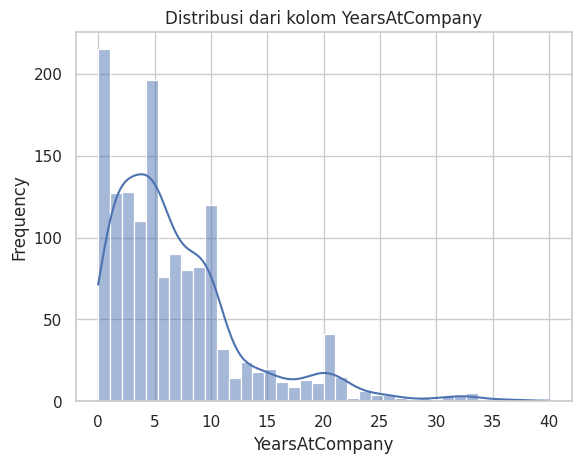

<Figure size 600x400 with 0 Axes>

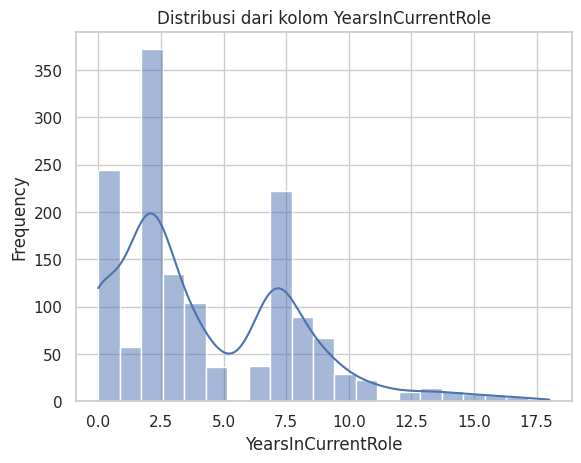

<Figure size 600x400 with 0 Axes>

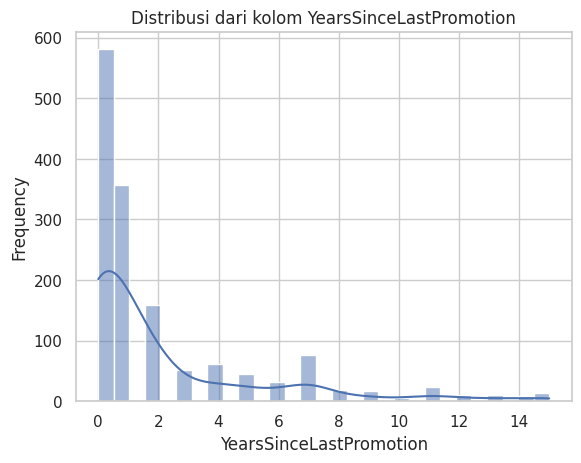

<Figure size 600x400 with 0 Axes>

In [ ]:
# Checking normality
# Menggunakan cara visual
# Loop in df
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    # Create a histogram using Seaborn
    sns.histplot(data=df[column], kde=True)

    # Set title and labels
    plt.title(f'Distribusi dari kolom {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Setting the width and height of figure
    plt.figure(figsize=(6,4))

    # Show the plot
    plt.show()

In [ ]:
from scipy import stats

# Loop for uji normalitas Agostino-Pearson
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Memeriksa apakah kolom numerik
        _, p_value = stats.normaltest(df[column].dropna())
        alpha = 0.05  # Tingkat signifikansi yang digunakan
        if p_value > alpha:
            print(f"Kolom '{column}' berdistribusi normal (p-value = {p_value:.4f})")
        else:
            print(f"Kolom '{column}' tidak berdistribusi normal (p-value = {p_value:.4f})")

Kolom 'Age' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'DailyRate' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'DistanceFromHome' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'Education' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'EmployeeNumber' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'EnvironmentSatisfaction' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'HourlyRate' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'JobInvolvement' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'JobLevel' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'JobSatisfaction' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'MonthlyIncome' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'MonthlyRate' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'NumCompaniesWorked' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'PercentSalaryHike' tidak berdistribusi normal (p-value = 0.0000)
Kolom 'PerformanceRating' tidak berdistribusi norm

In [ ]:
# Analisis Korelasi menggunakan metode spearman
df_corr = df.corr(method='spearman')
df_corr

<ipython-input-134-4c486ccdc2fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method='spearman')


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
Age,1.000000,0.007290,-0.019291,0.204937,-0.001770,0.009820,0.028858,0.034456,0.489618,-0.005185,...,0.007709,0.000093,0.046063,0.056633,0.656896,0.000316,-0.003707,0.251686,0.197978,0.173647
DailyRate,0.007290,1.000000,-0.002754,-0.013607,-0.051800,0.018961,0.023511,0.042469,0.003816,0.027829,...,0.025070,0.000624,0.009685,0.038514,0.020951,-0.011339,-0.040352,-0.009778,0.007208,-0.037631
DistanceFromHome,-0.019291,-0.002754,1.000000,0.015708,0.038906,-0.010401,0.020446,0.034430,0.022148,-0.013078,...,0.029666,0.011320,0.005852,0.030190,-0.002912,-0.024848,-0.020402,0.010513,0.013708,-0.004685
Education,0.204937,-0.013607,0.015708,1.000000,0.042815,-0.027625,0.014432,0.037231,0.107419,-0.005175,...,0.004300,-0.025081,-0.013173,0.013794,0.162177,-0.023749,0.017350,0.064196,0.054567,0.032203
EmployeeNumber,-0.001770,-0.051800,0.038906,0.042815,1.000000,0.021750,0.034717,-0.002453,-0.011057,-0.047150,...,-0.008179,-0.020675,-0.072991,0.059480,-0.003748,0.026502,0.009994,0.013205,-0.001079,0.007857
EnvironmentSatisfaction,0.009820,0.018961,-0.010401,-0.027625,0.021750,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,...,-0.030489,-0.029160,0.005353,0.009826,-0.013882,-0.011659,0.027169,0.008425,0.020140,0.026082
HourlyRate,0.028858,0.023511,0.020446,0.014432,0.034717,-0.052380,1.000000,0.043884,-0.033876,-0.068340,...,-0.009876,-0.002185,0.000259,0.050543,-0.012072,0.000292,-0.010003,-0.029032,-0.034016,-0.052412
JobInvolvement,0.034456,0.042469,0.034430,0.037231,-0.002453,-0.015301,0.043884,1.000000,-0.018424,-0.012148,...,-0.016999,-0.024733,0.037857,0.034464,0.006444,0.002014,-0.019889,0.013836,0.015548,-0.008307
JobLevel,0.489618,0.003816,0.022148,0.107419,-0.011057,-0.000192,-0.033876,-0.018424,1.000000,-0.000852,...,-0.032453,-0.018608,0.011311,0.047786,0.734678,-0.019729,0.040466,0.472283,0.391085,0.269096
JobSatisfaction,-0.005185,0.027829,-0.013078,-0.005175,-0.047150,-0.002993,-0.068340,-0.012148,-0.000852,1.000000,...,0.023970,0.006979,-0.014679,0.012785,-0.015875,-0.011681,-0.029781,0.012280,0.000531,0.007497


In [ ]:
# Filtering Active Employee

df_active_employee = df[df['Attrition'] == 'No']
df_active_employee

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,12,3,1,0,0,2,3,0,0,0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,15,3,4,0,0,2,3,0,0,0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,15,3,3,0,0,5,4,0,0,0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,...,16,3,3,0,0,4,1,0,0,0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,...,14,3,4,0,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,11,3,4,0,33,5,1,29,8,11
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,19,3,4,0,22,5,4,18,13,13
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,14,3,4,0,10,1,3,2,2,2
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,18,3,2,1,12,3,3,11,7,1


Berdasarkan data, terdapat 1242 karyawan aktif

In [ ]:
# Department terbanyak
df_active_employee['Department'].value_counts().to_frame()

,Department
Research & Development,828
Sales,354
Human Resources,51


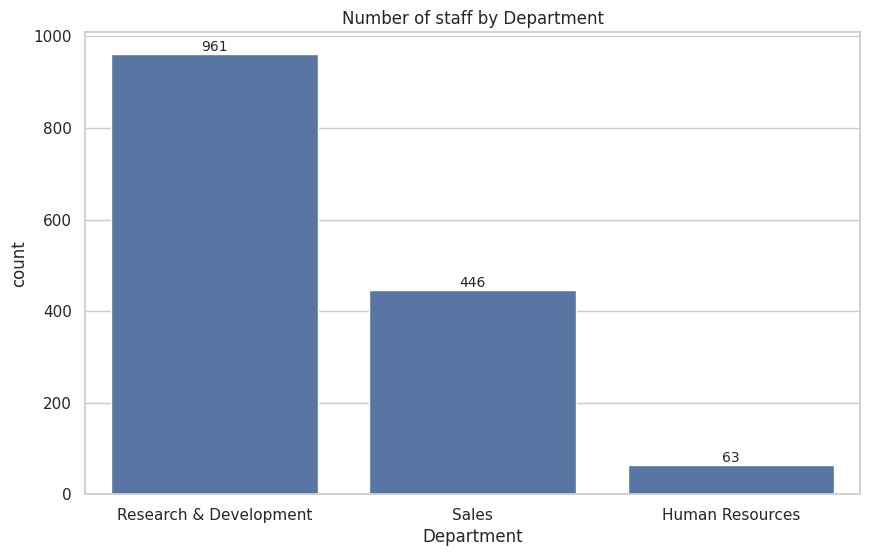

In [ ]:
# Number of staff in Department

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts and adding value
ax = sns.countplot(df, x='Department')

# Adding title and labels
plt.title('Number of staff by Department')
plt.ylabel('count')
ax.bar_label(ax.containers[0], fontsize=10) # Creating bar labels

# Displaying bar charts
plt.show()

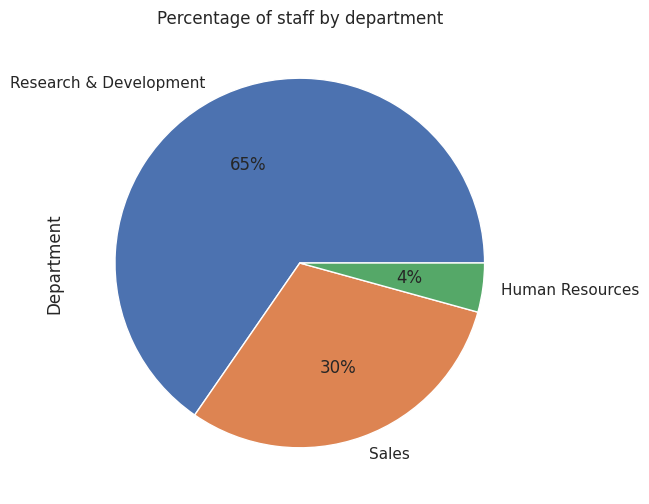

In [ ]:
# Percentage of staff by department

# Number of staff by department
df_department= df['Department'].value_counts()

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating pie charts and adding value
df_department.plot.pie(autopct='%.0f%%')

# Adding title
plt.title('Percentage of staff by department')

# Displaying pie charts
plt.show()

In [ ]:
# Dari aktif employee yg paling banyak job roles dari Sales Executive dan Research scientist
df_active_employee.groupby('JobRole')['EmpID'].count().to_frame()

,EmpID
JobRole,
Healthcare Representative,122
Human Resources,40
Laboratory Technician,197
Manager,97
Manufacturing Director,135
Research Director,78
Research Scientist,245
Sales Executive,269
Sales Representative,50


In [ ]:
# Komposisi job level di perusahaan
df_active_employee.groupby('JobLevel')['EmpID'].count().to_frame()

,EmpID
JobLevel,
1,400
2,482
3,186
4,101
5,64


In [ ]:
# Paling banyak aktif dari job level tengah
df_active_employee.groupby('Education')['EmpID'].count()

Education
1    139
2    238
3    473
4    340
5    43 
Name: EmpID, dtype: int64

In [ ]:
# life sciences mendominasi education field
df_active_employee.groupby('EducationField')['EmpID'].count()

EducationField
Human Resources     20 
Life Sciences       517
Marketing           124
Medical             401
Other               71 
Technical Degree    100
Name: EmpID, dtype: int64

## **Attrition Profiling**

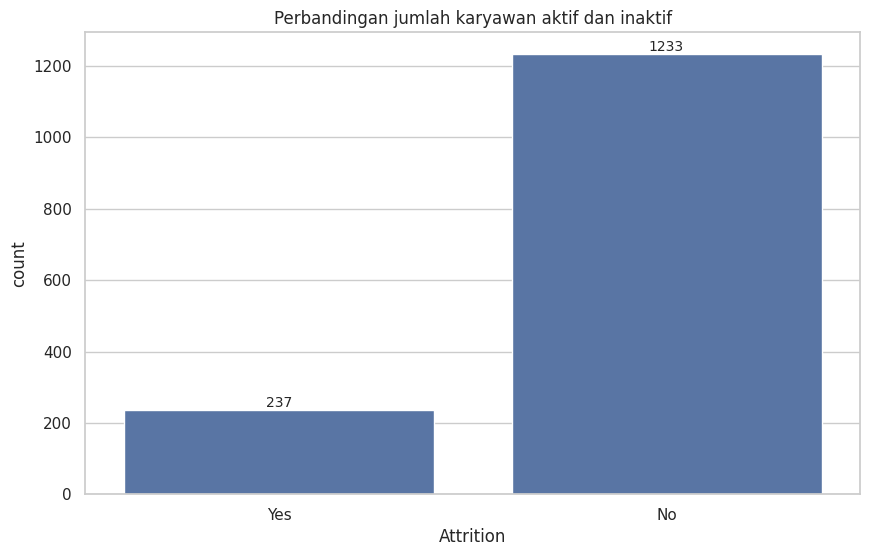

In [ ]:
# Bar chart of order perbanding jumlah karyawan aktif dan inaktif

# Setting the width and height of figure
plt.figure(figsize=(10,6))

# Creating bar charts and adding value
ax = sns.countplot(df, x='Attrition')

# Adding title and labels
plt.title('Perbandingan jumlah karyawan aktif dan inaktif')
plt.ylabel('count')
ax.bar_label(ax.containers[0], fontsize=10) # Creating bar labels

# Displaying bar charts
plt.show()

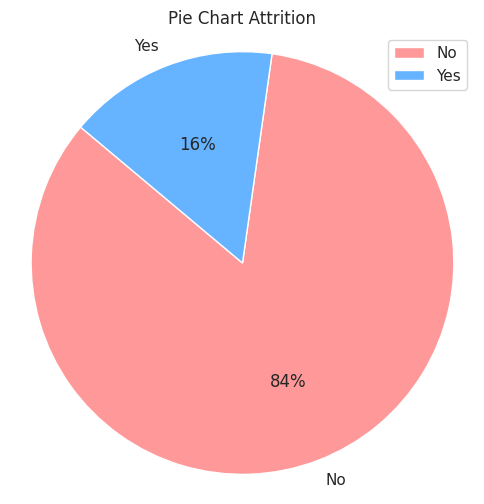

In [ ]:
import matplotlib.pyplot as plt

# Data contoh
attrition_counts = df['Attrition'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.0f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Pie Chart Attrition')
plt.axis('equal')  # Agar pie plot menjadi lingkaran
plt.legend()
plt.show()

In [ ]:
# Banyaknya karyawan yang sudah keluar
df_attrittion = df[df['Attrition'] == 'Yes']
df_attrittion

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,13,3,3,0,0,2,3,0,0,0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,14,3,4,0,0,3,3,0,0,0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,12,3,4,0,0,0,3,0,0,0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,12,3,3,0,0,2,4,0,0,0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,...,19,3,4,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,RM127,58,55+,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,...,12,3,4,1,40,3,2,40,10,15
1455,RM596,58,55+,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,...,12,3,4,0,40,2,3,31,15,13
1456,RM661,58,55+,Yes,Travel_Frequently,781,Research & Development,2,1,Life Sciences,...,14,3,4,1,3,3,2,1,0,0
1458,RM701,58,55+,Yes,Travel_Rarely,289,Research & Development,2,3,Technical Degree,...,24,4,1,0,7,4,3,1,0,0


Berdasarkan data, terdapat 238

In [ ]:
# dari R&D paling banyak keluar
df_attrittion.groupby('Department')['EmpID'].count()

Department
Human Resources           12 
Research & Development    133
Sales                     92 
Name: EmpID, dtype: int64

In [ ]:
# dari Laboratory Technician paling banyak keluar, diikuti sales executive
df_attrittion.groupby('JobRole')['EmpID'].count()

JobRole
Healthcare Representative    9 
Human Resources              12
Laboratory Technician        62
Manager                      5 
Manufacturing Director       10
Research Director            2 
Research Scientist           47
Sales Executive              57
Sales Representative         33
Name: EmpID, dtype: int64

In [ ]:
# Rata rata monthly rate per job role
df_attrittion.groupby('JobRole')['MonthlyRate'].mean()

JobRole
Healthcare Representative    13984.222222
Human Resources              12853.083333
Laboratory Technician        14047.290323
Manager                      16885.000000
Manufacturing Director       14251.600000
Research Director            21020.500000
Research Scientist           13699.957447
Sales Executive              15635.684211
Sales Representative         15012.575758
Name: MonthlyRate, dtype: float64

In [ ]:
# Paling banyak keluar dari job level rendah
df_attrittion.groupby('JobLevel')['EmpID'].count()

JobLevel
1    143
2    52 
3    32 
4    5  
5    5  
Name: EmpID, dtype: int64

In [ ]:
# Paling banyak keluar dari education di kategori tengah
df_attrittion.groupby('Education')['EmpID'].count()

Education
1    31
2    44
3    99
4    58
5    5 
Name: EmpID, dtype: int64

In [ ]:
# Paling banyak keluar dari life sciences
df_attrittion.groupby('EducationField')['EmpID'].count()

EducationField
Human Resources     7 
Life Sciences       89
Marketing           35
Medical             63
Other               11
Technical Degree    32
Name: EmpID, dtype: int64

## **Analisis karakteristik dari profil karyawan yang keluar dan tidak berdasarkan karakteristik internal**

Dari segi age groupnya, tingkat pendidikan, jenis kelamin, status pernikahan


## **Analisis berdasarkan status Attrition dari Karyawan (antara yang keluar dan tidak)**

**Analisis dari pendapatan atau kompensasi yang diberikan dari perusahaan ada perbedaan ga antara yang sudah
keluar dan tidak (A fair and Competitive salary)**

In [ ]:
# analisis apakah ada perbedaan MonthlyIncome antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
from scipy.stats import mannwhitneyu
monthly_income_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
monthly_income_no = df[df['Attrition'] == 'No']['MonthlyIncome']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(monthly_income_yes, monthly_income_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara MonthlyIncome berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara MonthlyIncome berdasarkan status attrition.")

Nilai uji statistik: 100620.5000
P-value: 0.0000
Terdapat perbedaan yang signifikan antara MonthlyIncome berdasarkan status attrition.


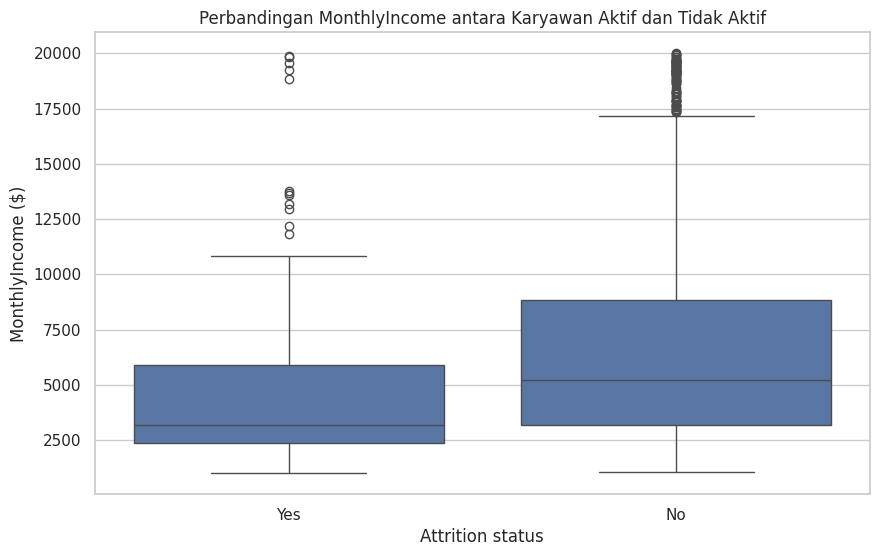

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter data untuk karyawan aktif dan tidak aktif
active = df[df['Attrition'] == 'No']
inactive = df[df['Attrition'] == 'Yes']

# Mengatur gaya plot seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn dengan estimator=np.median
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Perbandingan MonthlyIncome antara Karyawan Aktif dan Tidak Aktif')
plt.xlabel('Attrition status')
plt.ylabel('MonthlyIncome ($)')
plt.show()

- Titik median terlihat berbeda antara Yes dan No, dimana untuk Attrition Yes berada pada pada antara 2500 - 5000, lebih rendah dari attrition No berada pada antara 5000 - 7500.
- Terdapat banyak Outlier pada kedua sisi.
- Maksimal MonthlyIncome pada Attrition Yes terlihat perbedaan cukup jauh antara Maksimal MonthlyIncome pada Attrition No.

In [ ]:
# Analisis antara status Attrition dan SalarySlab

SalarySlab_attrition = pd.crosstab(df['Attrition'], df['SalarySlab'])
SalarySlab_attrition

SalarySlab,10k-15k,15k+,5k-10k,Upto 5k
Attrition,,,,
No,128,128,391,586
Yes,20,5,49,163


In [ ]:
from scipy.stats import chi2_contingency

stat, p_value, dof, expected_freq = chi2_contingency(SalarySlab_attrition)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara SalarySlab dan Attrition.")
else:
    print("Tidak terdapat keterkaitan antara SalarySlab dan Attrition.")

Nilai uji statistik Chi squared: 100620.5000
P-value: 0.0000
Terdapat keterkaitan antara SalarySlab dan Attrition.


<Figure size 1000x600 with 0 Axes>

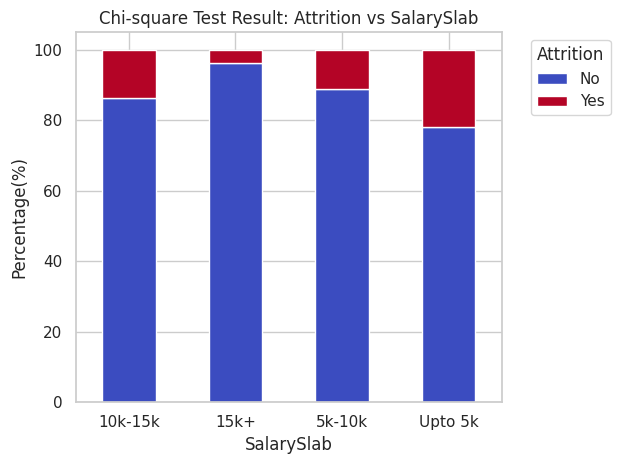

In [ ]:
# Visualisasi Chi-square test Attrition vs SalarySlab
SalarySlab_attrition = pd.crosstab(df['SalarySlab'], df['Attrition'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
SalarySlab_attrition.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: Attrition vs SalarySlab')
plt.xlabel('SalarySlab')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()  # Untuk memastikan legenda tidak tumpang tindih dengan grafik
plt.show()

- Terdapat perbedaan proporsi antara Attrition Yes dan No ditiap kategori SalarySlab.
- Proporsi terbesar ada pada kategori 15k+.

In [ ]:
# Analisis apakah ada perbedaan MonthlyRate antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
monthly_rate_yes = df[df['Attrition'] == 'Yes']['MonthlyRate']
monthly_rate_no = df[df['Attrition'] == 'No']['MonthlyRate']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(monthly_rate_yes, monthly_rate_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara MonthlyRate berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara MonthlyRate berdasarkan status attrition.")

Nilai uji statistik: 149610.5000
P-value: 0.5587
Tidak terdapat perbedaan yang signifikan antara MonthlyRate berdasarkan status attrition.


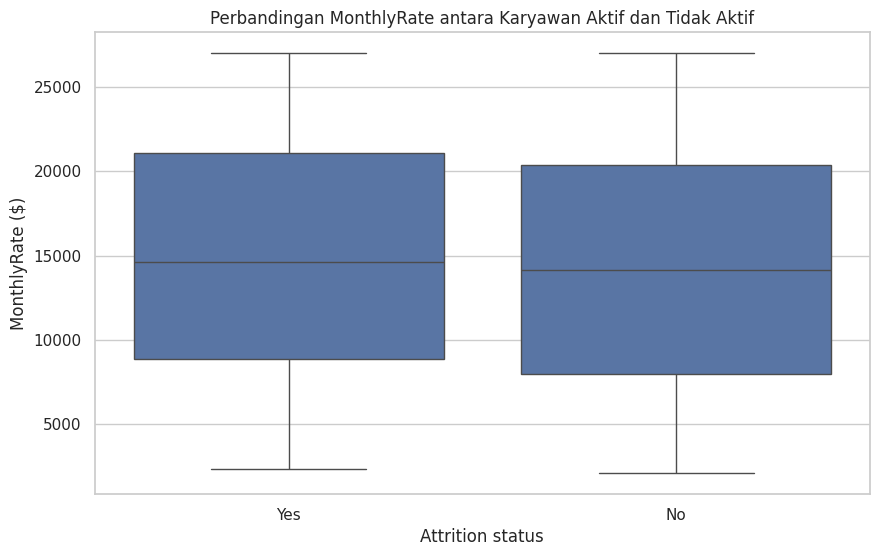

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter data untuk karyawan aktif dan tidak aktif
active = df[df['Attrition'] == 'No']
inactive = df[df['Attrition'] == 'Yes']

# Mengatur gaya plot seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn dengan estimator=np.median
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyRate', data=df)
plt.title('Perbandingan MonthlyRate antara Karyawan Aktif dan Tidak Aktif')
plt.xlabel('Attrition status')
plt.ylabel('MonthlyRate ($)')
plt.show()

In [ ]:
# Analisis apakah ada perbedaan DailyRate antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
Daily_rate_yes = df[df['Attrition'] == 'Yes']['DailyRate']
Daily_rate_no = df[df['Attrition'] == 'No']['DailyRate']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(Daily_rate_yes, Daily_rate_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara DailyRate berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara DailyRate berdasarkan status attrition.")

Nilai uji statistik: 133042.0000
P-value: 0.0290
Terdapat perbedaan yang signifikan antara DailyRate berdasarkan status attrition.


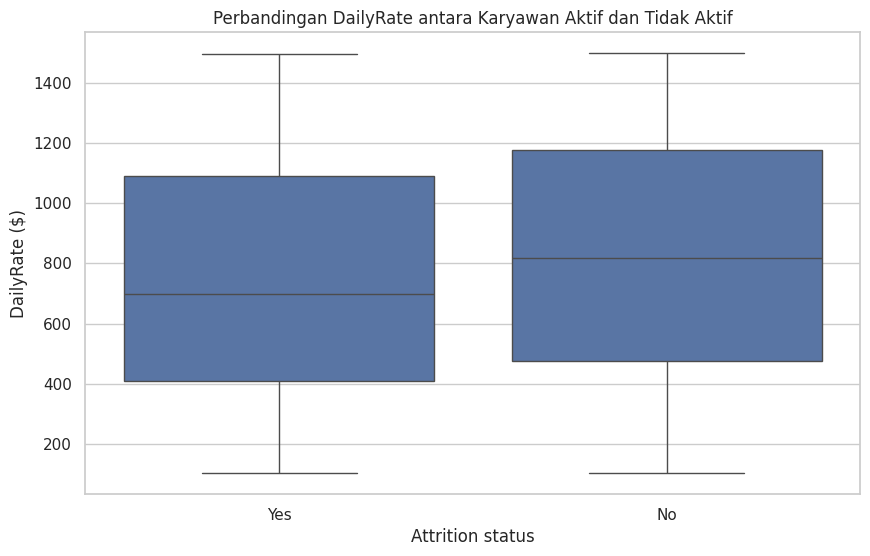

In [ ]:
# Filter data untuk karyawan aktif dan tidak aktif
active = df[df['Attrition'] == 'No']
inactive = df[df['Attrition'] == 'Yes']

# Mengatur gaya plot seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn dengan estimator=np.median
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DailyRate', data=df)
plt.title('Perbandingan DailyRate antara Karyawan Aktif dan Tidak Aktif')
plt.xlabel('Attrition status')
plt.ylabel('DailyRate ($)')
plt.show()

- Titik median terlihat berbeda antara Yes dan No, dimana untuk Attrition Yes berada pada pada antara 600 - 800, lebih rendah dari attrition No berada pada antara 800 - 1000.

In [ ]:
# Analisis apakah ada perbedaan HourlyRate antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
hourly_rate_yes = df[df['Attrition'] == 'Yes']['HourlyRate']
hourly_rate_no = df[df['Attrition'] == 'No']['HourlyRate']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(hourly_rate_yes, hourly_rate_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara hourlyRate berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara hourlyRate berdasarkan status attrition.")

Nilai uji statistik: 144575.5000
P-value: 0.7976
Tidak terdapat perbedaan yang signifikan antara hourlyRate berdasarkan status attrition.


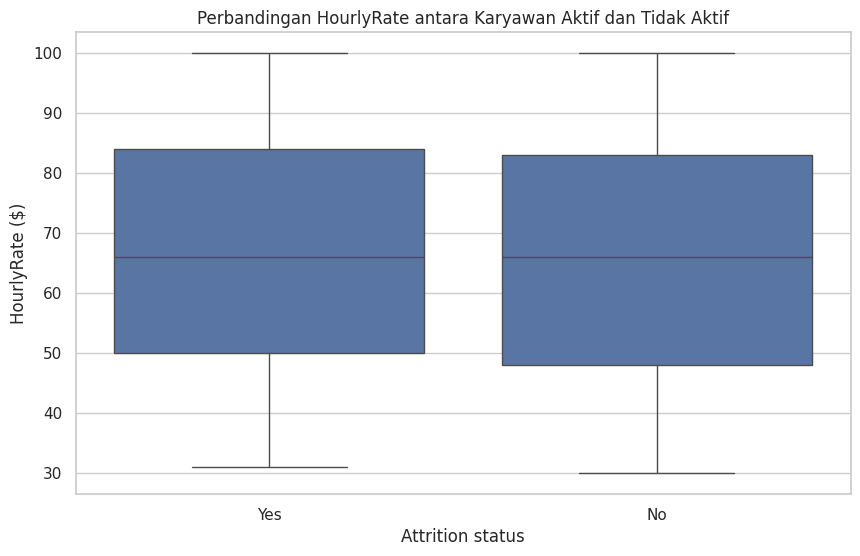

In [ ]:
# Filter data untuk karyawan aktif dan tidak aktif
active = df[df['Attrition'] == 'No']
inactive = df[df['Attrition'] == 'Yes']

# Mengatur gaya plot seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn dengan estimator=np.median
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='HourlyRate', data=df)
plt.title('Perbandingan HourlyRate antara Karyawan Aktif dan Tidak Aktif')
plt.xlabel('Attrition status')
plt.ylabel('HourlyRate ($)')
plt.show()

In [ ]:
 # Analisis apakah ada perbedaan PercentSalaryHike antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
PercentSalaryHike_attr_yes = df[df['Attrition'] == 'Yes']['PercentSalaryHike']
PercentSalaryHike_attr_no = df[df['Attrition'] == 'No']['PercentSalaryHike']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(PercentSalaryHike_attr_yes, PercentSalaryHike_attr_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara PercentSalaryHike berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara PercentSalaryHike berdasarkan status attrition.")

Nilai uji statistik: 140726.5000
P-value: 0.3655
Tidak terdapat perbedaan yang signifikan antara PercentSalaryHike berdasarkan status attrition.


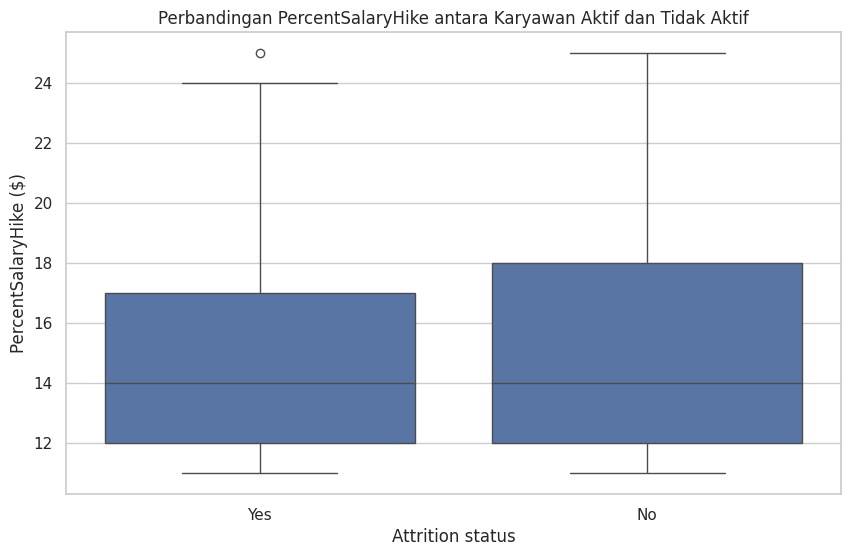

In [ ]:
# Filter data untuk karyawan aktif dan tidak aktif
active = df[df['Attrition'] == 'No']
inactive = df[df['Attrition'] == 'Yes']

# Mengatur gaya plot seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn dengan estimator=np.median
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=df)
plt.title('Perbandingan PercentSalaryHike antara Karyawan Aktif dan Tidak Aktif')
plt.xlabel('Attrition status')
plt.ylabel('PercentSalaryHike ($)')
plt.show()

**Analisis dari ada perbedaaan lingkungan kerja antara karyawan aktif dan karyawan yang tidak aktif
(Environment and Workplace relationship)**


In [ ]:
# Analisis antara status Attrition dan EnvironmentSatisfaction

EnvironmentSatisfaction_attrition = pd.crosstab(df['Attrition'], df['EnvironmentSatisfaction'])
EnvironmentSatisfaction_attrition

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
No,212,244,391,386
Yes,72,43,62,60


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(EnvironmentSatisfaction_attrition)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara attrition dan EnvironmentSatisfaction.")
else:
    print("Tidak terdapat keterkaitan antara attrition dan EnvironmentSatisfaction.")

Nilai uji statistik Chi squared: 140726.5000
P-value: 0.0001
Terdapat keterkaitan antara attrition dan EnvironmentSatisfaction.


<Figure size 1000x600 with 0 Axes>

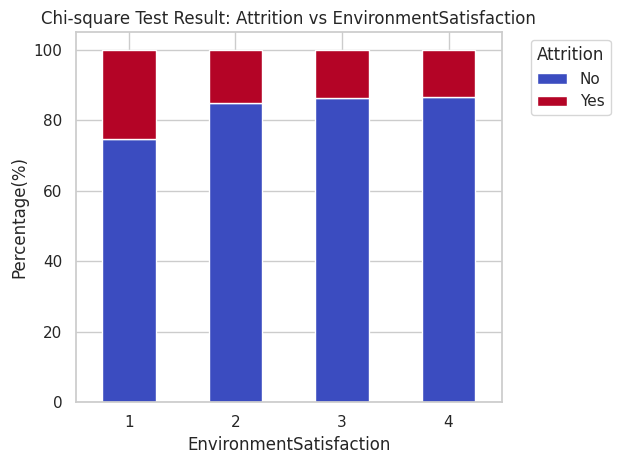

In [ ]:
# Visualisasi Chi-square test Attrition vs EnvironmentSatisfaction
EnvironmentSatisfaction_attrition = pd.crosstab(df['EnvironmentSatisfaction'], df['Attrition'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
EnvironmentSatisfaction_attrition.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: Attrition vs EnvironmentSatisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()  # Untuk memastikan legenda tidak tumpang tindih dengan grafik
plt.show()

- Terdapat perbedaan proporsi antara Attrition Yes dan No ditiap kategori EnvironmentSatisfaction.
- Proporsi EnvironmentSatisfaction bernilai 1 terlihat cukup berbeda dengan ketiga yang lainnya.

In [ ]:
# Analisis antara status Attrition dan RelationshipSatisfaction

RelationshipSatisfaction_attrition = pd.crosstab(df['Attrition'], df['RelationshipSatisfaction'])
RelationshipSatisfaction_attrition

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
No,219,258,388,368
Yes,57,45,71,64


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(RelationshipSatisfaction_attrition)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara attrition dan RelationshipSatisfaction.")
else:
    print("Tidak terdapat keterkaitan antara attrition dan RelationshipSatisfaction.")

Nilai uji statistik Chi squared: 140726.5000
P-value: 0.1550
Tidak terdapat keterkaitan antara attrition dan RelationshipSatisfaction.


<Figure size 1000x600 with 0 Axes>

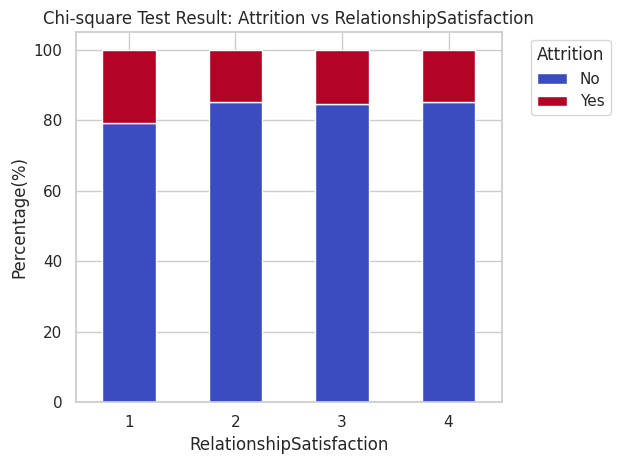

In [ ]:
# Visualisasi Chi-square test Attrition vs RelationshipSatisfaction
RelationshipSatisfaction_attrition = pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
RelationshipSatisfaction_attrition.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: Attrition vs RelationshipSatisfaction')
plt.xlabel('RelationshipSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()
plt.show()

In [ ]:
# Analisis apakah ada perbedaan YearsAtCompany antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
YearsAtCompany_attr_yes = df[df['Attrition'] == 'Yes']['YearsAtCompany']
YearsAtCompany_attr_no = df[df['Attrition'] == 'No']['YearsAtCompany']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(YearsAtCompany_attr_yes, YearsAtCompany_attr_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara YearsAtCompany berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara YearsAtCompany berdasarkan status attrition.")

Nilai uji statistik: 102582.0000
P-value: 0.0000
Terdapat perbedaan yang signifikan antara YearsAtCompany berdasarkan status attrition.


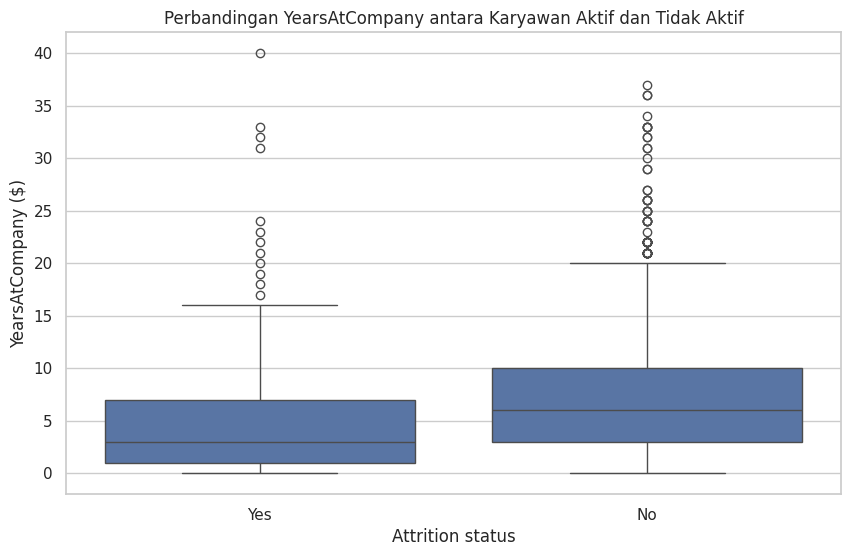

In [ ]:
# Filter data untuk karyawan aktif dan tidak aktif
active = df[df['Attrition'] == 'No']
inactive = df[df['Attrition'] == 'Yes']

# Mengatur gaya plot seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn dengan estimator=np.median
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Perbandingan YearsAtCompany antara Karyawan Aktif dan Tidak Aktif')
plt.xlabel('Attrition status')
plt.ylabel('YearsAtCompany ($)')
plt.show()

- Titik median terlihat berbeda antara Yes dan No, dimana untuk Attrition Yes berada pada pada antara 0 - 5, lebih rendah dari attrition No berada pada antara 5 - 10.
- Terdapat banyak Outlier pada kedua sisi.
- Maksimal YearsAtCompany pada Attrition Yes terlihat perbedaan cukup antara Maksimal YearsAtCompany pada Attrition No.

**Analisis dari Career growth opportunities yang diberikan perusahaan antara yang karyawan aktif (Attrition: No) dan inaktif (Attrition: yes)
(Career growth opportunities)**

In [ ]:
# Analisis apakah ada perbedaan TrainingTimesLastYear antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
TrainingTimesLastYear_attr_yes = df[df['Attrition'] == 'Yes']['TrainingTimesLastYear']
TrainingTimesLastYear_attr_no = df[df['Attrition'] == 'No']['TrainingTimesLastYear']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(TrainingTimesLastYear_attr_yes, TrainingTimesLastYear_attr_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara TrainingTimesLastYear berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara TrainingTimesLastYear berdasarkan status attrition.")

Nilai uji statistik: 134785.5000
P-value: 0.0473
Terdapat perbedaan yang signifikan antara TrainingTimesLastYear berdasarkan status attrition.


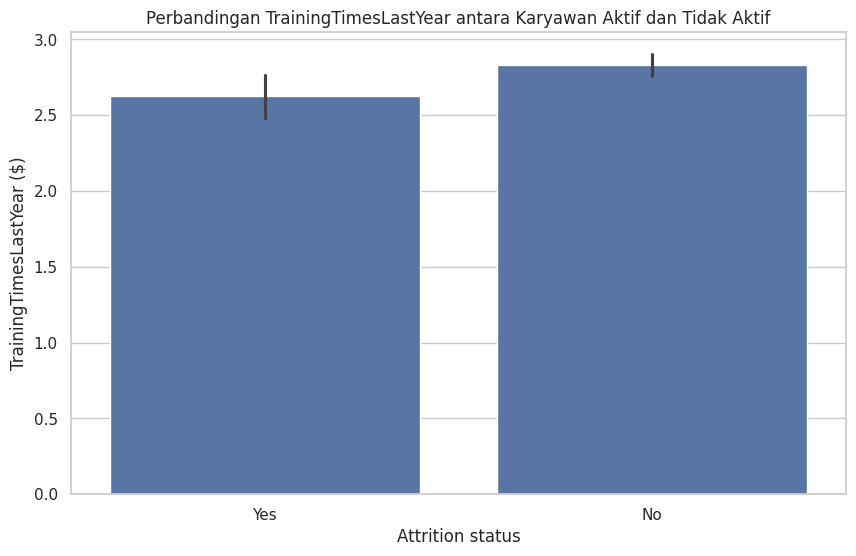

In [ ]:
# Filter data untuk karyawan aktif dan tidak aktif
active = df[df['Attrition'] == 'No']
inactive = df[df['Attrition'] == 'Yes']

# Mengatur gaya plot seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn dengan estimator=np.median
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='TrainingTimesLastYear', data=df)
plt.title('Perbandingan TrainingTimesLastYear antara Karyawan Aktif dan Tidak Aktif')
plt.xlabel('Attrition status')
plt.ylabel('TrainingTimesLastYear ($)')
plt.show()

In [ ]:
# Analisis apakah ada perbedaan YearsSinceLastPromotion antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
YearsSinceLastPromotion_attr_yes = df[df['Attrition'] == 'Yes']['YearsSinceLastPromotion']
YearsSinceLastPromotion_attr_no = df[df['Attrition'] == 'No']['YearsSinceLastPromotion']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(YearsSinceLastPromotion_attr_yes, YearsSinceLastPromotion_attr_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara YearsSinceLastPromotion berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara YearsSinceLastPromotion berdasarkan status attrition.")

Nilai uji statistik: 134374.0000
P-value: 0.0412
Terdapat perbedaan yang signifikan antara YearsSinceLastPromotion berdasarkan status attrition.


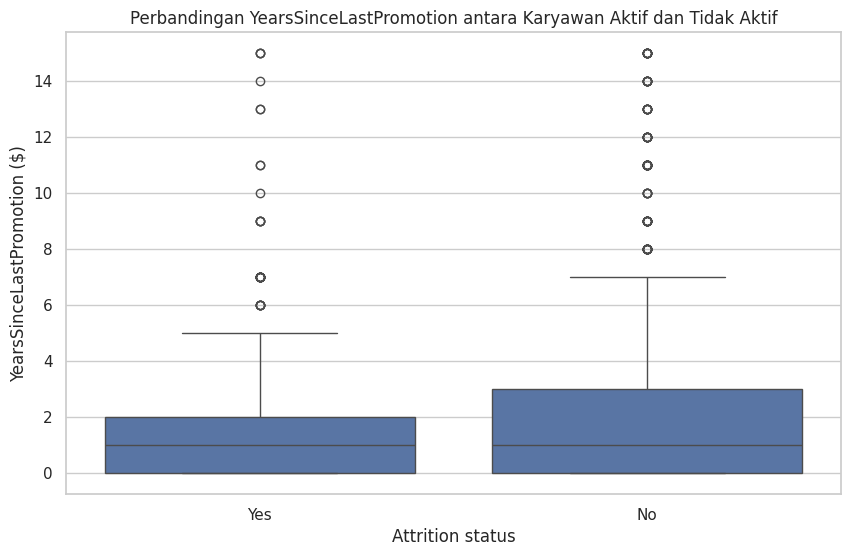

In [ ]:
# Filter data untuk karyawan aktif dan tidak aktif
active = df[df['Attrition'] == 'No']
inactive = df[df['Attrition'] == 'Yes']

# Mengatur gaya plot seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn dengan estimator=np.median
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('Perbandingan YearsSinceLastPromotion antara Karyawan Aktif dan Tidak Aktif')
plt.xlabel('Attrition status')
plt.ylabel('YearsSinceLastPromotion ($)')
plt.show()

- Terdapat banyak Outlier pada kedua sisi.
- Maksimal MonthlyIncome pada Attrition Yes terlihat perbedaan cukup jauh antara Maksimal MonthlyIncome pada Attrition No.
- Pada Attrition Yes 50% data berada diantara tahun ke 0 hingga ke 2, sedangkan pada Attrition No 50% data berada diantara tahun ke 0 hingga ke 4.

In [ ]:
# Analisis apakah ada perbedaan YearsInCurrentRole antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
YearsInCurrentRole_attr_yes = df[df['Attrition'] == 'Yes']['YearsInCurrentRole']
YearsInCurrentRole_attr_no = df[df['Attrition'] == 'No']['YearsInCurrentRole']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(YearsInCurrentRole_attr_yes, YearsInCurrentRole_attr_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara YearsInCurrentRole berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara YearsInCurrentRole berdasarkan status attrition.")

Nilai uji statistik: 105214.0000
P-value: 0.0000
Terdapat perbedaan yang signifikan antara YearsInCurrentRole berdasarkan status attrition.


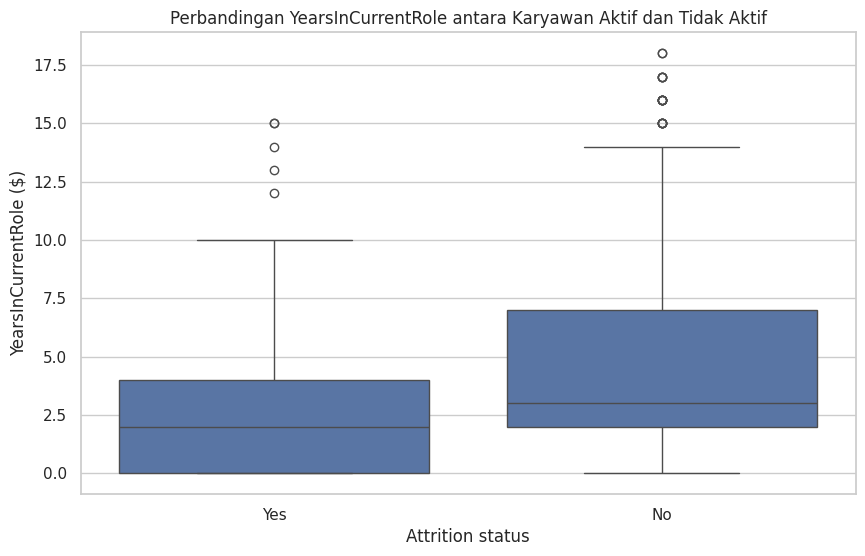

In [ ]:
# Filter data untuk karyawan aktif dan tidak aktif
active = df[df['Attrition'] == 'No']
inactive = df[df['Attrition'] == 'Yes']

# Mengatur gaya plot seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn dengan estimator=np.median
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=df)
plt.title('Perbandingan YearsInCurrentRole antara Karyawan Aktif dan Tidak Aktif')
plt.xlabel('Attrition status')
plt.ylabel('YearsInCurrentRole ($)')
plt.show()

- Terdapat Outlier pada kedua sisi.
- Maksimal MonthlyIncome pada Attrition Yes terlihat perbedaan cukup jauh antara Maksimal MonthlyIncome pada Attrition No.
- Pada Attrition Yes 50% data berada diantara tahun ke 0 hingga ke 5, sedangkan pada Attrition No 50% data berada diantara tahun ke 0 hingga ke 7.5.

In [ ]:
# Analisis antara status Attrition dan JobLevel

JobLevel_attrition = pd.crosstab(df['Attrition'], df['JobLevel'])
JobLevel_attrition

JobLevel,1,2,3,4,5
Attrition,,,,,
No,400,482,186,101,64
Yes,143,52,32,5,5


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobLevel_attrition)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara Attrition dan JobLevel.")
else:
    print("Tidak terdapat keterkaitan antara Attrition dan JobLevel.")

Nilai uji statistik Chi squared: 105214.0000
P-value: 0.0000
Terdapat keterkaitan antara Attrition dan JobLevel.


<Figure size 1000x600 with 0 Axes>

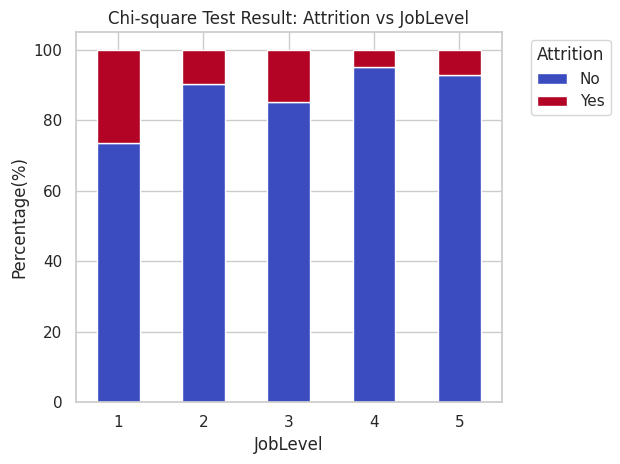

In [ ]:
# Visualisasi Chi-square test Attrition vs JobLevel
JobLevel_attrition = pd.crosstab(df['JobLevel'], df['Attrition'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobLevel_attrition.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: Attrition vs JobLevel')
plt.xlabel('JobLevel')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()  # Untuk memastikan legenda tidak tumpang tindih dengan grafik
plt.show()

- Terdapat perbedaan proporsi antara Attrition Yes dan No ditiap kategori JobLevel.
- Proporsi JobLevel terlihat cukup berbeda dengan yang lainnya.

**Analisis dari adanya perbedaan pemberian rating Recognition dari company
(Rewards and Recognation)**

In [ ]:
# Analisis antara status Attrition dan PerformanceRating

PerformanceRating_attrition = pd.crosstab(df['Attrition'], df['PerformanceRating'])
PerformanceRating_attrition

PerformanceRating,3,4
Attrition,,
No,1044,189
Yes,200,37


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(PerformanceRating_attrition)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara attrition dan PerformanceRating.")
else:
    print("Tidak terdapat keterkaitan antara attrition dan PerformanceRating.")

Nilai uji statistik Chi squared: 105214.0000
P-value: 0.9901
Tidak terdapat keterkaitan antara attrition dan PerformanceRating.


<Figure size 1000x600 with 0 Axes>

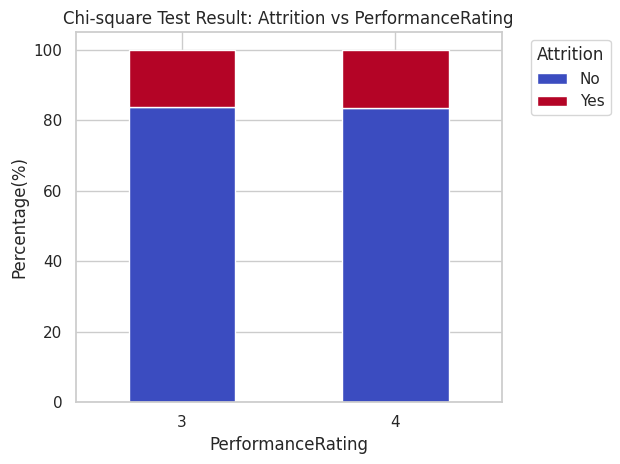

In [ ]:
# Visualisasi Chi-square test Attrition vs PerformanceRating
PerformanceRating_attrition = pd.crosstab(df['PerformanceRating'], df['Attrition'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
PerformanceRating_attrition.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: Attrition vs PerformanceRating')
plt.xlabel('PerformanceRating')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()  # Untuk memastikan legenda tidak tumpang tindih dengan grafik
plt.show()

**Analisis dari ada perbedaan perspektif work life balance antara karyawan yang telah keluar dan yang masih bertahan (Work life Balance and social life)**


In [ ]:
# Analisis antara status Attrition dan WorkLifeBalance

WorkLifeBalance_attrition = pd.crosstab(df['Attrition'], df['WorkLifeBalance'])
WorkLifeBalance_attrition

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,55,286,766,126
Yes,25,58,127,27


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(WorkLifeBalance_attrition)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara attrition dan WorkLifeBalance.")
else:
    print("Tidak terdapat keterkaitan antara attrition dan WorkLifeBalance.")

Nilai uji statistik Chi squared: 105214.0000
P-value: 0.0010
Terdapat keterkaitan antara attrition dan WorkLifeBalance.


<Figure size 1000x600 with 0 Axes>

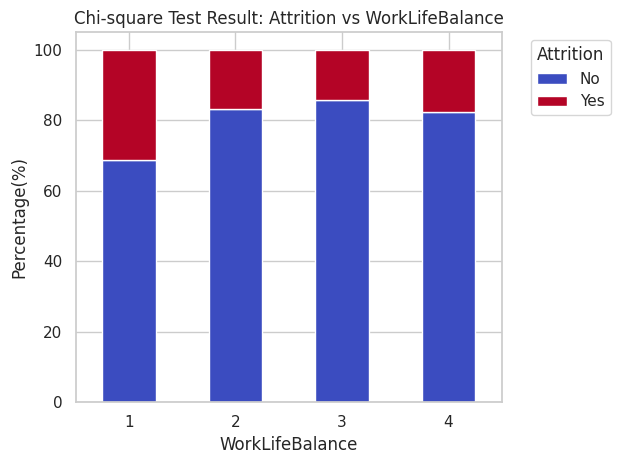

In [ ]:
# Visualisasi Chi-square test Attrition vs WorkLifeBalance
WorkLifeBalance_attrition = pd.crosstab(df['WorkLifeBalance'], df['Attrition'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
WorkLifeBalance_attrition.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: Attrition vs WorkLifeBalance')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()  # Untuk memastikan legenda tidak tumpang tindih dengan grafik
plt.show()

- Terdapat perbedaan proporsi antara Attrition Yes dan No ditiap kategori WorkLifeBalance.

**Analisis dari External Factors terhadap status attrition**


In [ ]:
# Analisis antara status Attrition dan MaritalStatus

MaritalStatus_attrition = pd.crosstab(df['Attrition'], df['MaritalStatus'])
MaritalStatus_attrition

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(MaritalStatus_attrition)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara Attrition dan MaritalStatus.")
else:
    print("Tidak terdapat keterkaitan antara Attrition dan MaritalStatus.")

Nilai uji statistik Chi squared: 105214.0000
P-value: 0.0000
Terdapat keterkaitan antara Attrition dan MaritalStatus.


<Figure size 1000x600 with 0 Axes>

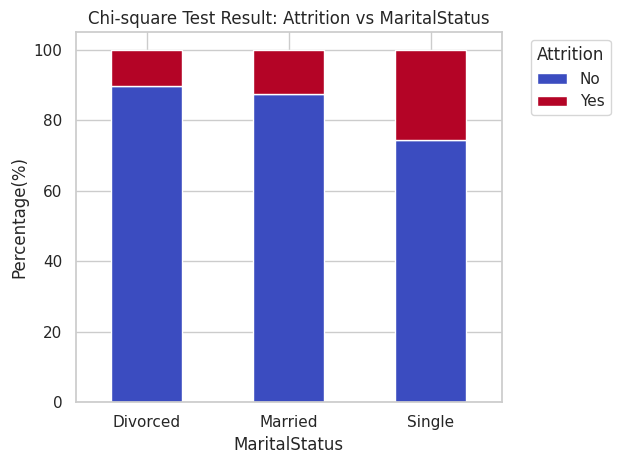

In [ ]:
# Visualisasi Chi-square test Attrition vs MaritalStatus
MaritalStatus_attrition = pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
MaritalStatus_attrition.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: Attrition vs MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()  # Untuk memastikan legenda tidak tumpang tindih dengan grafik
plt.show()

- Terdapat perbedaan proporsi antara Attrition Yes dan No ditiap kategori MaritalStatus.

In [ ]:
# Analisis apakah ada perbedaan Education antara yang sudah keluar dan tidak
# Memisahkan data berdasarkan
Education_attr_yes = df[df['Attrition'] == 'Yes']['Education']
Education_attr_no = df[df['Attrition'] == 'No']['Education']

# Uji Mann-Whitney
statistic, p_value = mannwhitneyu(Education_attr_yes, Education_attr_no)

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara Education berdasarkan status attrition.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara Education berdasarkan status attrition.")

Nilai uji statistik: 139460.5000
P-value: 0.2448
Tidak terdapat perbedaan yang signifikan antara Education berdasarkan status attrition.


## **Analisis Berdasarkan Job Satisfaction**

In [ ]:
# Analisis antara status JobSatisfaction dan Attrition

JobSatisfaction_Attrition = pd.crosstab(df['JobSatisfaction'], df['Attrition'])
JobSatisfaction_Attrition

Attrition,No,Yes
JobSatisfaction,,
1,223,66
2,234,46
3,369,73
4,407,52


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobSatisfaction_Attrition)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara JobSatisfaction dan Attrition.")
else:
    print("Tidak terdapat keterkaitan antara JobSatisfaction dan Attrition.")

Nilai uji statistik Chi squared: 139460.5000
P-value: 0.0006
Terdapat keterkaitan antara JobSatisfaction dan Attrition.


<Figure size 1000x600 with 0 Axes>

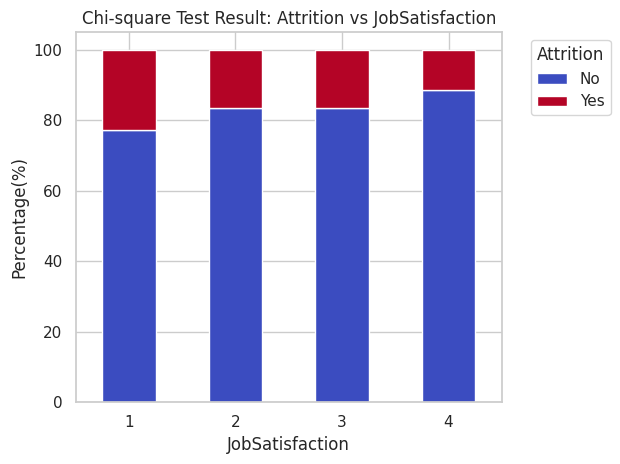

In [ ]:
# Visualisasi Chi-square test Attrition vs JobSatisfaction
JobSatisfaction_attrition = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobSatisfaction_attrition.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: Attrition vs JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()  # Untuk memastikan legenda tidak tumpang tindih dengan grafik
plt.show()

- Terdapat perbedaan proporsi antara Attrition Yes dan No ditiap kategori JobSatisfaction.

In [ ]:
# Analisis antara status JobSatisfaction dan JobRole

JobSatisfaction_JobRole = pd.crosstab(df['JobSatisfaction'], df['JobRole'])
JobSatisfaction_JobRole

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
JobSatisfaction,,,,,,,,,
1,26,10,56,21,26,15,54,69,12
2,19,16,48,21,32,16,53,54,21
3,43,13,75,27,49,27,90,91,27
4,43,13,80,33,38,22,95,112,23


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobSatisfaction_JobRole)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara JobSatisfaction dan JobRole.")
else:
    print("Tidak terdapat keterkaitan antara JobSatisfaction dan JobRole.")

Nilai uji statistik Chi squared: 139460.5000
P-value: 0.7832
Tidak terdapat keterkaitan antara JobSatisfaction dan JobRole.


<Figure size 1000x600 with 0 Axes>

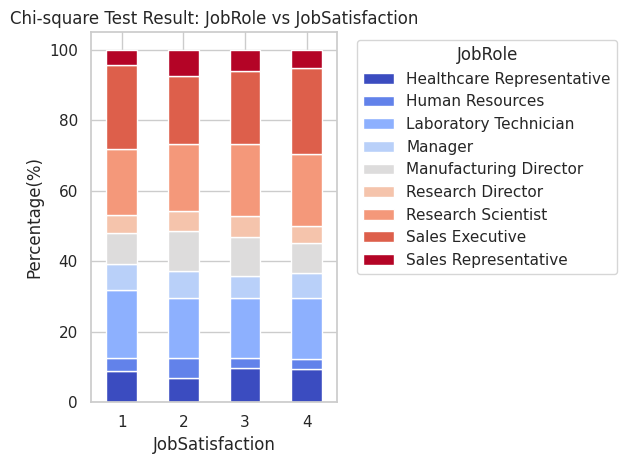

In [ ]:
# Visualisasi Chi-square test JobRole vs JobSatisfaction
JobSatisfaction_JobRole = pd.crosstab(df['JobSatisfaction'], df['JobRole'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobSatisfaction_JobRole.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: JobRole vs JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='JobRole', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()  # Untuk memastikan legenda tidak tumpang tindih dengan grafik
plt.show()

In [ ]:
# Analisis antara status JobSatisfaction dan Department

JobSatisfaction_Department = pd.crosstab(df['JobSatisfaction'], df['Department'])
JobSatisfaction_Department

Department,Human Resources,Research & Development,Sales
JobSatisfaction,,,
1,11,192,86
2,20,174,86
3,15,300,127
4,17,295,147


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobSatisfaction_Department)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara JobSatisfaction dan Department.")
else:
    print("Tidak terdapat keterkaitan antara JobSatisfaction dan Department.")

Nilai uji statistik Chi squared: 139460.5000
P-value: 0.2019
Tidak terdapat keterkaitan antara JobSatisfaction dan Department.


<Figure size 1000x600 with 0 Axes>

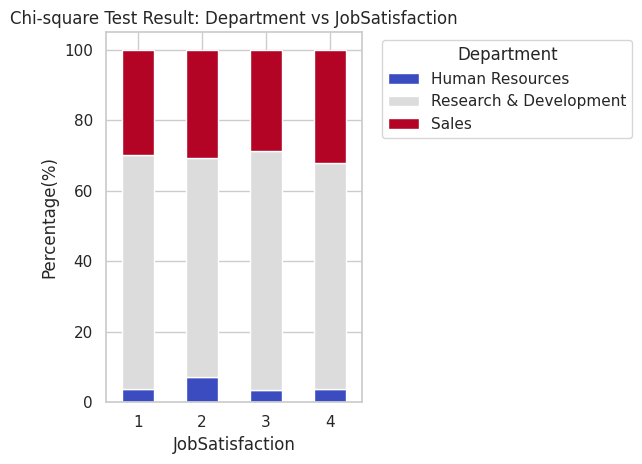

In [ ]:
# Visualisasi Chi-square test Department vs JobSatisfaction
JobSatisfaction_Department = pd.crosstab(df['JobSatisfaction'], df['Department'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobSatisfaction_Department.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: Department vs JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()
plt.show()

In [ ]:
# Analisis antara status JobSatisfaction dan JobLevel

JobSatisfaction_JobLevel = pd.crosstab(df['JobSatisfaction'], df['JobLevel'])
JobSatisfaction_JobLevel

JobLevel,1,2,3,4,5
JobSatisfaction,,,,,
1,106,102,50,21,10
2,108,97,37,22,16
3,162,163,64,28,25
4,167,172,67,35,18


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobSatisfaction_JobLevel)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara JobSatisfaction dan JobLevel.")
else:
    print("Tidak terdapat keterkaitan antara JobSatisfaction dan JobLevel.")

Nilai uji statistik Chi squared: 139460.5000
P-value: 0.9027
Tidak terdapat keterkaitan antara JobSatisfaction dan JobLevel.


<Figure size 1000x600 with 0 Axes>

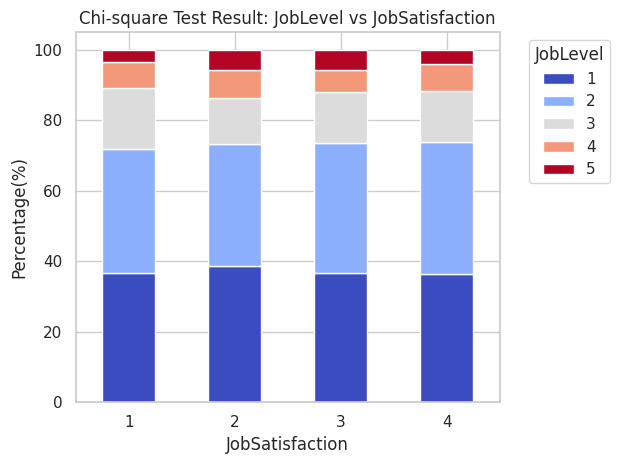

In [ ]:
# Visualisasi Chi-square test JobLevel vs JobSatisfaction
JobSatisfaction_JobLevel = pd.crosstab(df['JobSatisfaction'], df['JobLevel'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobSatisfaction_JobLevel.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: JobLevel vs JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='JobLevel', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()
plt.show()

In [ ]:
# Analisis antara status JobSatisfaction dan SalarySlab

JobSatisfaction_SalarySlab = pd.crosstab(df['JobSatisfaction'], df['SalarySlab'])
JobSatisfaction_SalarySlab

SalarySlab,10k-15k,15k+,5k-10k,Upto 5k
JobSatisfaction,,,,
1,28,27,88,146
2,29,27,78,146
3,46,39,123,234
4,45,40,151,223


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobSatisfaction_SalarySlab)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara JobSatisfaction dan SalarySlab.")
else:
    print("Tidak terdapat keterkaitan antara JobSatisfaction dan SalarySlab.")

Nilai uji statistik Chi squared: 139460.5000
P-value: 0.9281
Tidak terdapat keterkaitan antara JobSatisfaction dan SalarySlab.


<Figure size 1000x600 with 0 Axes>

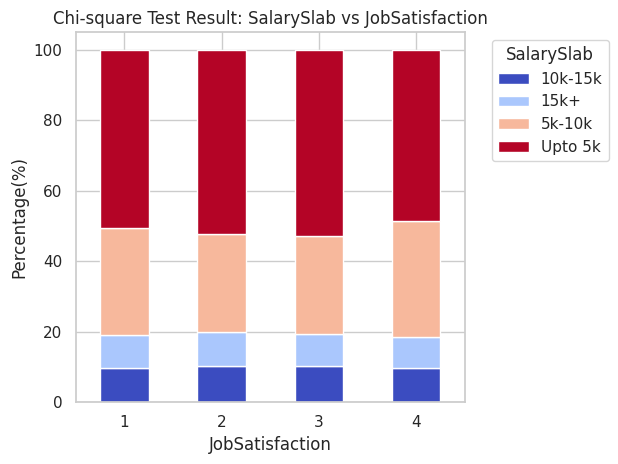

In [ ]:
# Visualisasi Chi-square test SalarySlab vs JobSatisfaction
JobSatisfaction_SalarySlab = pd.crosstab(df['JobSatisfaction'], df['SalarySlab'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobSatisfaction_SalarySlab.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: SalarySlab vs JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='SalarySlab', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()
plt.show()

In [ ]:
# Analisis antara status JobSatisfaction dan JobInvolvement

JobSatisfaction_JobInvolvement = pd.crosstab(df['JobSatisfaction'], df['JobInvolvement'])
JobSatisfaction_JobInvolvement

JobInvolvement,1,2,3,4
JobSatisfaction,,,,
1,14,75,166,34
2,10,81,164,25
3,28,108,263,43
4,31,111,275,42


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobSatisfaction_JobInvolvement)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara JobSatisfaction dan JobInvolvement.")
else:
    print("Tidak terdapat keterkaitan antara JobSatisfaction dan JobInvolvement.")

Nilai uji statistik Chi squared: 139460.5000
P-value: 0.5933
Tidak terdapat keterkaitan antara JobSatisfaction dan JobInvolvement.


<Figure size 1000x600 with 0 Axes>

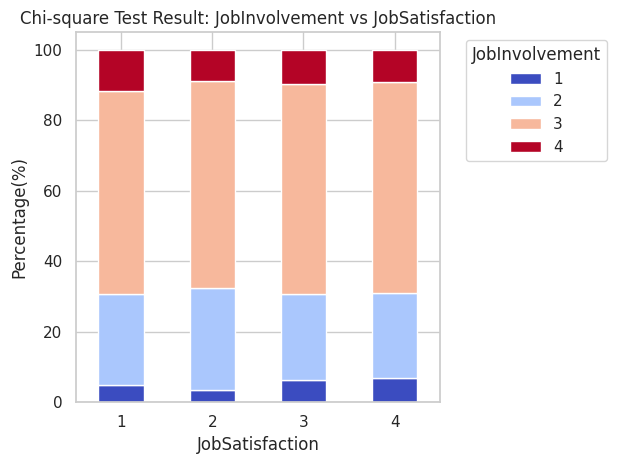

In [ ]:
# Visualisasi Chi-square test JobInvolvement vs JobSatisfaction
JobSatisfaction_JobInvolvement = pd.crosstab(df['JobSatisfaction'], df['JobInvolvement'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobSatisfaction_JobInvolvement.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: JobInvolvement vs JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='JobInvolvement', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()
plt.show()

In [ ]:
# Analisis antara status JobSatisfaction dan EnvironmentSatisfaction

JobSatisfaction_EnvironmentSatisfaction = pd.crosstab(df['JobSatisfaction'], df['EnvironmentSatisfaction'])
JobSatisfaction_EnvironmentSatisfaction

EnvironmentSatisfaction,1,2,3,4
JobSatisfaction,,,,
1,53,55,94,87
2,47,59,87,87
3,100,84,128,130
4,84,89,144,142


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobSatisfaction_EnvironmentSatisfaction)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara JobSatisfaction dan EnvironmentSatisfaction.")
else:
    print("Tidak terdapat keterkaitan antara JobSatisfaction dan EnvironmentSatisfaction.")

Nilai uji statistik Chi squared: 139460.5000
P-value: 0.8056
Tidak terdapat keterkaitan antara JobSatisfaction dan EnvironmentSatisfaction.


<Figure size 1000x600 with 0 Axes>

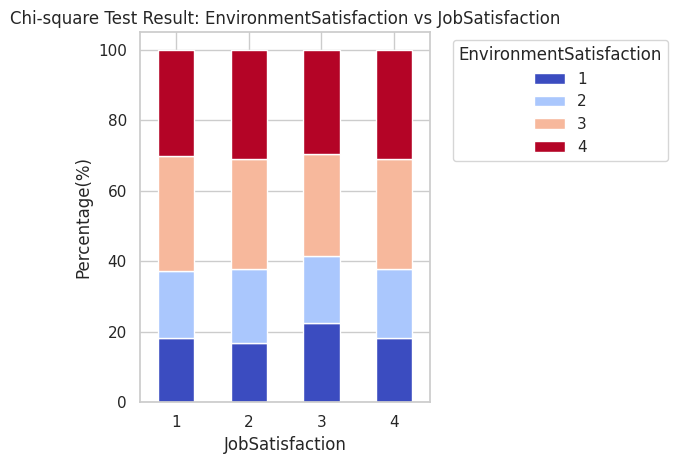

In [ ]:
# Visualisasi Chi-square test EnvironmentSatisfaction vs JobSatisfaction
JobSatisfaction_EnvironmentSatisfaction = pd.crosstab(df['JobSatisfaction'], df['EnvironmentSatisfaction'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobSatisfaction_EnvironmentSatisfaction.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: EnvironmentSatisfaction vs JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='EnvironmentSatisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()
plt.show()

In [ ]:
# Analisis antara status JobSatisfaction dan RelationshipSatisfaction

JobSatisfaction_RelationshipSatisfaction = pd.crosstab(df['JobSatisfaction'], df['RelationshipSatisfaction'])
JobSatisfaction_RelationshipSatisfaction

RelationshipSatisfaction,1,2,3,4
JobSatisfaction,,,,
1,54,57,91,87
2,53,57,81,89
3,85,94,133,130
4,84,95,154,126


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobSatisfaction_RelationshipSatisfaction)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara JobSatisfaction dan RelationshipSatisfaction.")
else:
    print("Tidak terdapat keterkaitan antara JobSatisfaction dan RelationshipSatisfaction.")

Nilai uji statistik Chi squared: 139460.5000
P-value: 0.9657
Tidak terdapat keterkaitan antara JobSatisfaction dan RelationshipSatisfaction.


<Figure size 1000x600 with 0 Axes>

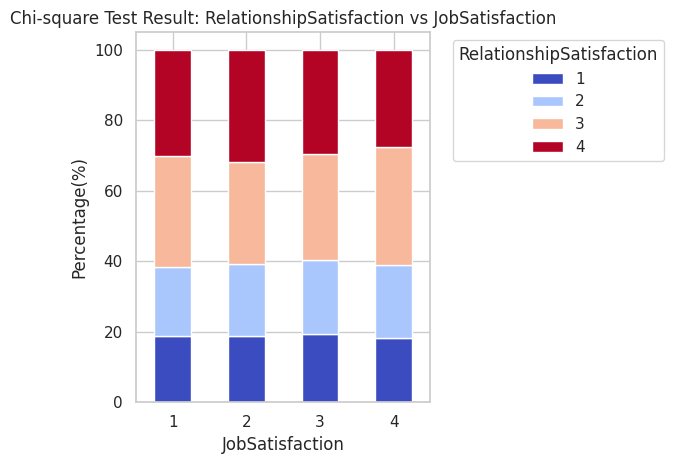

In [ ]:
# Visualisasi Chi-square test RelationshipSatisfaction vs JobSatisfaction
JobSatisfaction_RelationshipSatisfaction = pd.crosstab(df['JobSatisfaction'], df['RelationshipSatisfaction'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobSatisfaction_RelationshipSatisfaction.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: RelationshipSatisfaction vs JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='RelationshipSatisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()
plt.show()

In [ ]:
# Analisis antara status JobSatisfaction dan AgeGroup

JobSatisfaction_AgeGroup = pd.crosstab(df['JobSatisfaction'], df['AgeGroup'])
JobSatisfaction_AgeGroup

AgeGroup,18-25,26-35,36-45,46-55,55+
JobSatisfaction,,,,,
1,23,121,93,40,12
2,23,111,90,49,7
3,41,179,135,75,12
4,36,195,150,62,16


In [ ]:
stat, p_value, dof, expected_freq = chi2_contingency(JobSatisfaction_AgeGroup)
p_value

alpha = 0.05  # Tingkat signifikansi yang digunakan

# Menampilkan hasil uji
print(f"Nilai uji statistik Chi squared: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Terdapat keterkaitan antara JobSatisfaction dan AgeGroup.")
else:
    print("Tidak terdapat keterkaitan antara JobSatisfaction dan AgeGroup.")

Nilai uji statistik Chi squared: 139460.5000
P-value: 0.9075
Tidak terdapat keterkaitan antara JobSatisfaction dan AgeGroup.


<Figure size 1000x600 with 0 Axes>

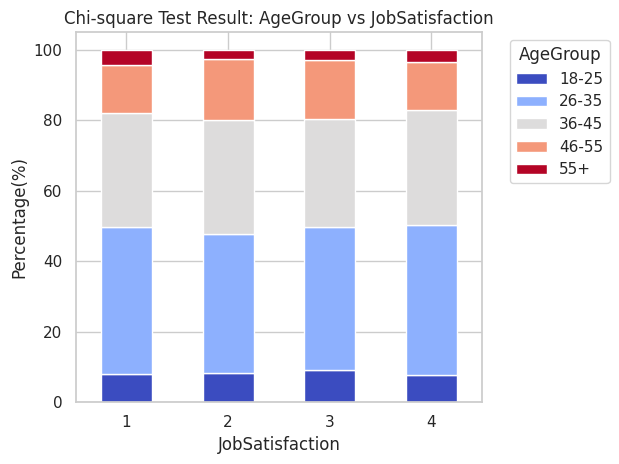

In [ ]:
# Visualisasi Chi-square test AgeGroup vs JobSatisfaction
JobSatisfaction_AgeGroup = pd.crosstab(df['JobSatisfaction'], df['AgeGroup'], normalize='index') * 100  # Mengubah proporsi ke persentase

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
JobSatisfaction_AgeGroup.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Chi-square Test Result: AgeGroup vs JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Percentage(%)')
plt.xticks(rotation=0)  # Mengatur label sumbu x agar tidak miring
plt.legend(title='AgeGroup', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar grafik
plt.tight_layout()
plt.show()

In [ ]:
# Spearman of all numerical columns
correlation_numerical_columns = df[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']].corr(method='spearman')
correlation_numerical_columns

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
Age,1.000000,0.007290,-0.019291,0.028858,0.471902,0.017451,0.353213,0.007709,0.656896,0.000316,0.251686,0.197978,0.173647
DailyRate,0.007290,1.000000,-0.002754,0.023511,0.016260,-0.032360,0.036548,0.025070,0.020951,-0.011339,-0.009778,0.007208,-0.037631
DistanceFromHome,-0.019291,-0.002754,1.000000,0.020446,0.002512,0.039618,-0.009592,0.029666,-0.002912,-0.024848,0.010513,0.013708,-0.004685
HourlyRate,0.028858,0.023511,0.020446,1.000000,-0.019762,-0.014888,0.019209,-0.009876,-0.012072,0.000292,-0.029032,-0.034016,-0.052412
MonthlyIncome,0.471902,0.016260,0.002512,-0.019762,1.000000,0.054277,0.190307,-0.033767,0.710024,-0.034847,0.464315,0.394712,0.264599
MonthlyRate,0.017451,-0.032360,0.039618,-0.014888,0.054277,1.000000,0.019553,-0.005471,0.013360,-0.010018,-0.029862,-0.006865,-0.016285
NumCompaniesWorked,0.353213,0.036548,-0.009592,0.019209,0.190307,0.019553,1.000000,0.000046,0.315196,-0.047336,-0.171070,-0.127673,-0.066950
PercentSalaryHike,0.007709,0.025070,0.029666,-0.009876,-0.033767,-0.005471,0.000046,1.000000,-0.025528,-0.004106,-0.054117,-0.025528,-0.055362
TotalWorkingYears,0.656896,0.020951,-0.002912,-0.012072,0.710024,0.013360,0.315196,-0.025528,1.000000,-0.014151,0.594193,0.492721,0.334996
TrainingTimesLastYear,0.000316,-0.011339,-0.024848,0.000292,-0.034847,-0.010018,-0.047336,-0.004106,-0.014151,1.000000,0.001389,0.004581,0.010215


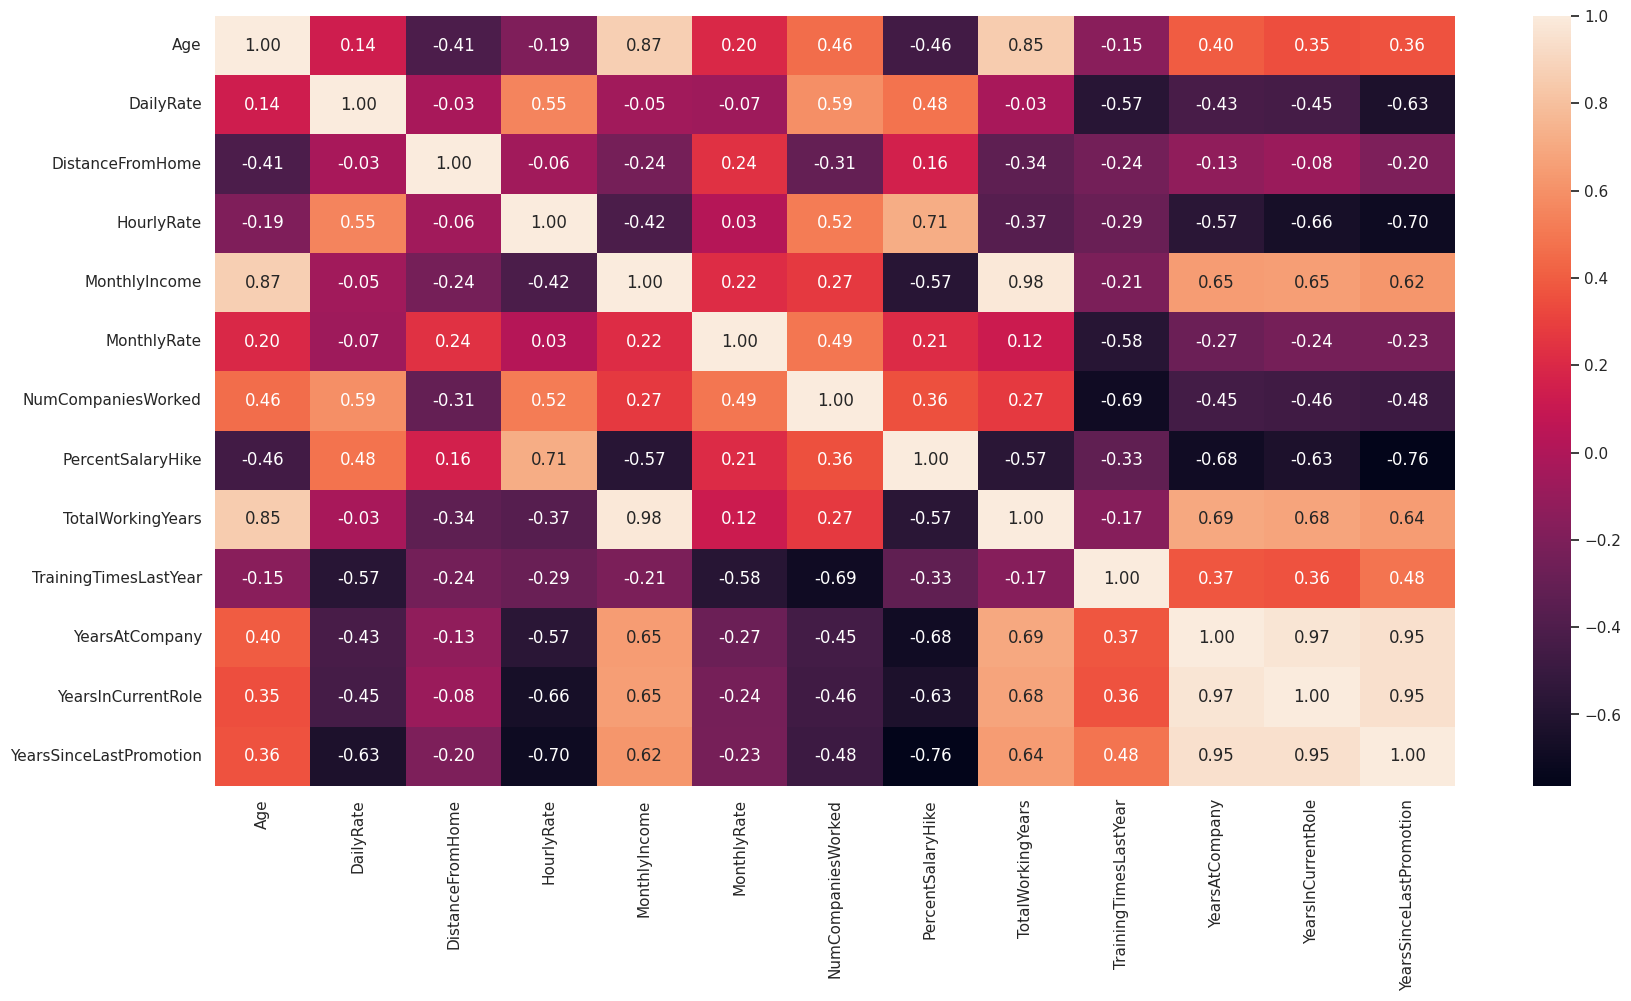

In [ ]:
# Numerical columns correlation
# Creating heatmap
plt.subplots(figsize=(20, 10))
sns.heatmap(correlation_numerical_columns.corr(method='spearman'), annot=True, fmt='.2f')
plt.show()

# Insight

- Berdasarkan status Attrition terhadap kolom - kolom yang berhubungan dengan aspek pendapatan dan kompensasi, terdapat perbedaan signifikan dengan kolom MonthlyIncome dan DailyRate, sedangkan pada kolom MonthlyRate, HourlyRate, dan PercentSalaryHike tidak terdapat perbedaan signifikan. Dari segi tingkat kategori gaji terdapat asosiasi/keterkaitan antara status Attrition dengan SalarySlab.
- Berdasarkan status Attrition terhadap kolom - kolom yang berhubungan dengan aspek lingkungan sosial kerja, terdapat asosiasi/keterkaitan dengan kolom EnvironmentSatisfaction, sedangkan pada kolom RelationshipSatisfaction tidak terdapat asosiasi/keterkaitan.
- Berdasarkan status Attrition terhadap kolom WorkLifeBalance terdapat asosiasi/keterkaitan.
- Berdasarkan status Attrition terhadap kolom - kolom yang berhubungan dengan aspek perkembangan karir, terdapat asosiasi/keterkaitan dengan kolom JobLevel. Terdapat perbedaan signifikan dengan kolom YearsSinceLastPromotion, YearsAtCompany, TrainingTimesLastYear, dan YearsInCurrentRole. sedangkan pada kolom PerformanceRating tidak terdapat asosiasi/keterkaitan.
- Berdasarkan status Attrition terhadap kolom JobSatisfaction terdapat asosiasi/keterkaitan.
- Berdasarkan status Attrition terhadap kolom - kolom yang berhubungan dengan aspek faktor eksternal, terdapat asosiasi/keterkaitan dengan kolom MaritalStatus.
- Berdasarkan status JobSatisfaction terhadap kolom JobRole, Department, JobLevel, SalarySlab, JobInvolvment, EnvironmentSatisfaction, RelationshipSatisfaction, dan AgeGroup tidak terdapat asosiasi/keterkaitan.

# Conclusion and Recommendation

**Attrition status**
- Ditemukan perbedaan signifikan antara MonthlyIncome dari karyawan yang bertahan atau tidak (terdapat signifikan).
- Ditemukan perbedaan signifikan antara DailyRate dari karyawan yang bertahan atau tidak.
- SalarySlab atau kelompok gaji punya hubungan/asosisasi terhadap karyawan bertahan atau tidak.
- EnvironmentSatisfaction punya hubungan/asosisasi terhadap karyawan bertahan atau tidak.
- JobLevel punya hubungan/asosisasi terhadap karyawan bertahan atau tidak.
- Marital status punya hubungan/asosiasi terhadap karyawan akan bertahan atau tidak.
- Perspektif WorkLifeBalance di perusahaan dari karyawan, punya hubungan/asosisasi terhadap karyawan bertahan atau tidak.


**Job Satisfaction**
- JobSatisfaction bisa direkomendasikan untuk digunakan sebagai metrik pengukur apakah karyawan akan resign atau tidak (ada hubungan).
- JobSatisfaction bisa membuat perbedaan yang signifikan dalam TotalWorkingYears atau durasi karyawan bekerja di perusahaan (tidak berbeda signifikan)